In [4]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../../db/news_2023_2025_with_stock_impact.csv")

count    35198.000000
mean        18.486186
std         13.214733
min          0.000000
25%         10.310000
50%         15.100000
75%         22.970000
max        209.450000
Name: impact_score, dtype: float64

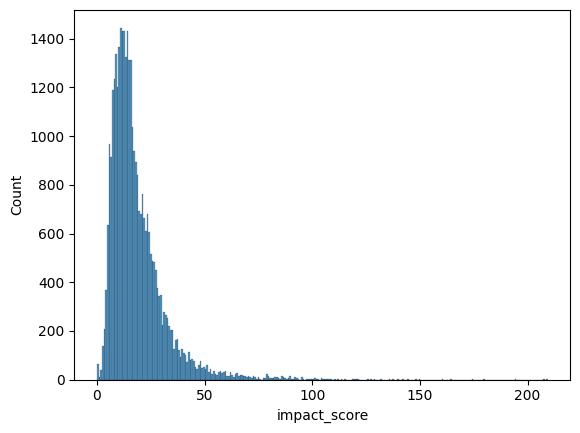

In [6]:
sns.histplot(df['impact_score'])
df['impact_score'].describe()

In [265]:
import ast

df["stock_len"] = df["labels_by_id"].apply(lambda x: len(ast.literal_eval(x)))

<Axes: xlabel='stock_len', ylabel='Count'>

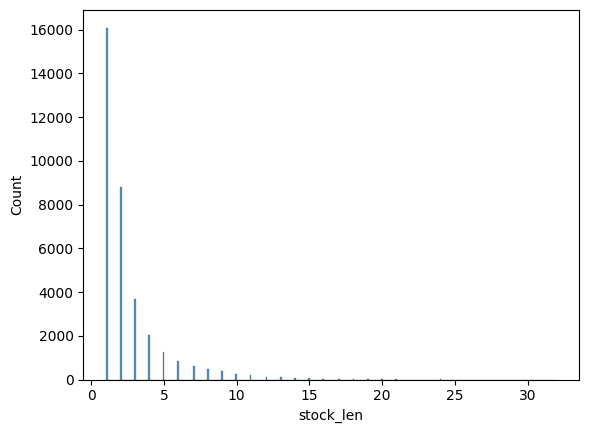

In [266]:
sns.histplot(df['stock_len'])

In [267]:
df['stock_len'].describe()

count    35198.000000
mean         2.509432
std          2.492289
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         32.000000
Name: stock_len, dtype: float64

<Axes: xlabel='impact_score', ylabel='Count'>

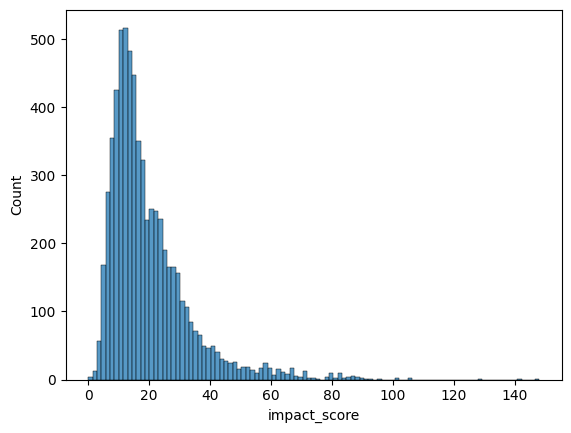

In [285]:
sns.histplot(df[df['stock_len'] >= 4]['impact_score'])

In [290]:
len(df[df["stock_len"] >= 5])

4549

In [295]:
df_impacted = df[(df["impact_score"] >= 20) & (df["stock_len"] <= 4)]
df_impacted.head(2)

,news_id,wdate,title,article,press,url,image,text_combined,labels_by_id,stock_name,...,D-2,D-1,D+1,D+2,D+3,D+7,D+14,D+30,impact_score,stock_len
0,20250523_0002,2025-05-23 18:52:00,"[단독] 카카오페이, 2500만 회원 쓱·스마일페이 품나…간편결제 시장 빅3 경쟁 후끈",매각가 5000억 안팎 달할듯\n결제시장 내 입지강화 포석\n카카오페이 [사진 = 연합뉴스]\n국내 대표 전자결제사업자인 카카오페이가 신...,매일경제,https://n.news.naver.com/mnews/article/009/0005497731,https://imgnews.pstatic.net/image/009/2025/05/23/0005497731_001_202505231852...,"[단독] 카카오페이, 2500만 회원 쓱·스마일페이 품나…간편결제 시장 빅3 경쟁 후끈 매각가 5000억 안팎 달할듯 결제시장 내 입지강...",['카카오페이'],카카오페이,...,-1.62,0.0,4.22,4.22,16.72,26.3,26.3,26.3,30.85,1
3,20250523_0007,2025-05-23 18:00:00,[단독] 전자결제 강자 카카오페이 쓱·스마일 페이 인수 추진,국내 대표 전자결제사업자인 카카오페이가 신세계이마트 산하 간편결제사업부 인수에 나섰다. 네이버페이·토스페이에 대항해 시장 점유율을 늘리려...,매일경제,https://n.news.naver.com/mnews/article/009/0005497721,https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221...,[단독] 전자결제 강자 카카오페이 쓱·스마일 페이 인수 추진 국내 대표 전자결제사업자인 카카오페이가 신세계이마트 산하 간편결제사업부 인수...,['카카오페이'],카카오페이,...,-1.62,0.0,4.22,4.22,16.72,26.3,26.3,26.3,30.85,1


<class 'pandas.core.frame.DataFrame'>
Index: 9716 entries, 0 to 35191
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   news_id        9716 non-null   object 
 1   wdate          9716 non-null   object 
 2   title          9716 non-null   object 
 3   article        9716 non-null   object 
 4   press          9716 non-null   object 
 5   url            9716 non-null   object 
 6   image          9716 non-null   object 
 7   text_combined  9716 non-null   object 
 8   labels_by_id   9716 non-null   object 
 9   stock_name     9716 non-null   object 
 10  종목코드           9716 non-null   int64  
 11  상장시가총액         9716 non-null   float64
 12  base_price     9716 non-null   float64
 13  D-30           9716 non-null   float64
 14  D-14           9716 non-null   float64
 15  D-7            9716 non-null   float64
 16  D-3            9716 non-null   float64
 17  D-2            9716 non-null   float64
 18  D-1         

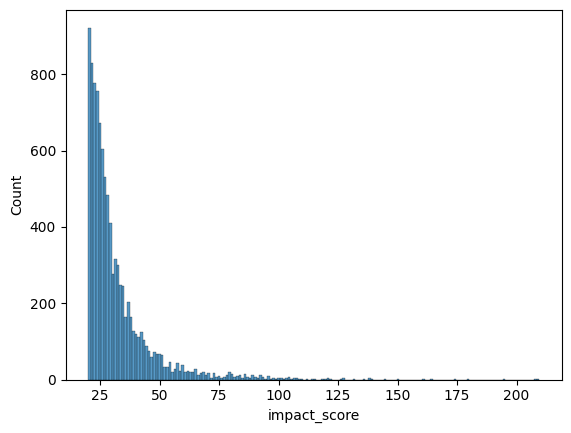

In [296]:
sns.histplot(df_impacted['impact_score'])
df_impacted.info()

In [297]:
df_impacted_random = df_impacted.sample(n=100, random_state=42).reset_index(drop=True)
df_impacted_random.head(2)

,news_id,wdate,title,article,press,url,image,text_combined,labels_by_id,stock_name,...,D-2,D-1,D+1,D+2,D+3,D+7,D+14,D+30,impact_score,stock_len
0,20241111_0043,2024-11-11 16:11:00,개미 '역대급 물타기'도 소용 없어…'5.5만 전자' 반등 관건은?,원본보기\n서울 삼성전자 서초사옥 모습. /사진=뉴시스.\n코스피 대장주 삼성전자가 연이은 악재에 크게 흔들리고 있다. 기대에 미치지 못...,머니투데이,https://n.news.naver.com/mnews/article/008/0005112814,https://imgnews.pstatic.net/image/008/2024/11/11/0005112814_001_202411120417...,개미 '역대급 물타기'도 소용 없어…'5.5만 전자' 반등 관건은? 원본보기 서울 삼성전자 서초사옥 모습. /사진=뉴시스. 코스피 대장주...,"['유진투자증권', '삼성전자', 'SK하이닉스']",유진투자증권,...,-1.22,-1.22,-4.90,-15.51,-17.01,-11.97,-19.46,-27.76,45.99,3
1,20240215_0337,2024-02-15 08:08:00,"LS, 전망치 밑돈 지난 4분기…투자로 성장 준비 중-NH투자",NH투자증권이 15일 LS에 대해 투자의견 매수와 목표주가 12만원을 유지했다. 여러 자회사들이 투자를 통해 성장을 준비하고 있다고 분석...,머니투데이,https://n.news.naver.com/mnews/article/008/0004998874,https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_800x420_20221...,"LS, 전망치 밑돈 지난 4분기…투자로 성장 준비 중-NH투자 NH투자증권이 15일 LS에 대해 투자의견 매수와 목표주가 12만원을 유지...","['NH투자증권', 'LS']",NH투자증권,...,0.97,-0.35,2.21,2.21,3.88,0.62,3.62,13.77,26.92,2


In [298]:
df_impacted_random[['title', 'url', 'labels_by_id', 'impact_score']][:40]

,title,url,labels_by_id,impact_score
0,개미 '역대급 물타기'도 소용 없어…'5.5만 전자' 반등 관건은?,https://n.news.naver.com/mnews/article/008/0005112814,"['유진투자증권', '삼성전자', 'SK하이닉스']",45.99
1,"LS, 전망치 밑돈 지난 4분기…투자로 성장 준비 중-NH투자",https://n.news.naver.com/mnews/article/008/0004998874,"['NH투자증권', 'LS']",26.92
2,미래에셋증권 全직원 업무에 AI활용한다,https://n.news.naver.com/mnews/article/014/0005336996,['미래에셋증권'],42.74
3,"자이글 ""미국 이차전지 JV 계약 해지…주주 지키기 위한 결단""",https://n.news.naver.com/mnews/article/008/0005163456,['LG에너지솔루션'],20.46
4,“다들 옮겼는데 나만 가만히?”…연금계좌 은행 떠나 ‘여기’로 머니무브,https://n.news.naver.com/mnews/article/009/0005243518,['미래에셋증권'],31.42
5,"[클릭 e종목]""코스맥스, 중국 훈풍에 이익 체력 높아질 것…목표가 유지""",https://n.news.naver.com/mnews/article/277/0005478835,['코스맥스'],22.42
6,에버랜드 겨울판 워터파크 '스파 캐비' 이용객 10만명 돌파,https://n.news.naver.com/mnews/article/008/0004997923,['삼성물산'],28.41
7,"신성이엔지, ‘HVAC KOREA’서 이머전 쿨링 시스템 등 고효율 솔루션 공개",https://n.news.naver.com/mnews/article/009/0005471773,['신성이엔지'],27.75
8,'스타' 젠슨 황 만난 크래프톤…신작 흥행에 주가 전망도 '쑥' [줍줍리포트],https://n.news.naver.com/mnews/article/011/0004474182,"['다올투자증권', '크래프톤', '현대차증권']",26.79
9,"“롯데웰푸드, 인도 모멘텀 점차 강화”…목표가↑",https://n.news.naver.com/mnews/article/009/0005321782,['롯데웰푸드'],27.02


In [62]:
pd.set_option("display.max_colwidth", 80)

In [321]:
import re
from kss import split_sentences

def remove_market_related_sentences(text: str) -> str:
    # 줄바꿈 제거
    text = text.replace("\n", " ")

    # 대괄호 포함 텍스트 제거: [파이낸셜뉴스], [사진] 등
    text = re.sub(r"\[[^\]]*\]", "", text)

    # 문장 단위 분리 (간단하게 마침표 기준, 필요시 KSS 등 적용 가능)
    sentences = split_sentences(text)

    # 제거할 패턴들 (뉴스 문장에서 자주 등장하는 패턴)
    patterns = [
        r"(자세한 내용|자세한 사항)",  # 뉴스 기본 표현
        r"\d{4}[.-]\d{1,2}[.-]\d{1,2}",  # 날짜 (예: 2025.03.26, 2024-12-01)
        r"([0-9,]+(?:만)?[0-9,]*\s?(?:원|만원))",  # 가격 (예: 3,500원, 12000원)
        r"(강세|펀드|시가총액|등락률)",  # 증시 용어
        r"\([+-]?[0-9.,]+%\)", # 괄호 안 퍼센트 등락률
        r"(투자의견|연구원|평가|예상치|증권가|리포트|팀장)",  # 애널리스트 용어
        r"(순이익|전년|매출|영업이익|영업적자|증시|코스피|코스닥|다우|나스닥|매출액|거래일|호조세|레버리지|투자자|조정|자산|수익률|이익률|수익성|내리막|부진한|낙폭|기대치|실적발표|기업 가치)",  # 시장 용어
    ]

    # 하나의 통합 패턴으로 컴파일
    combined_pattern = re.compile("|".join(patterns))

    # 필터링된 문장만 유지
    filtered = [s for s in sentences if not combined_pattern.search(s)]

    text_preprocessed = " ".join(filtered)

    print(f"원문:{sentences}\n|\n전처리 된 문장: {text_preprocessed}\n\n")

    return text_preprocessed

In [320]:
from tqdm import tqdm 
tqdm.pandas()  # 이거 반드시 호출해야 함

df_impacted_random["article_preprocessed"] = df_impacted_random["article"].progress_apply(
    remove_market_related_sentences
)

  4%|▍         | 4/100 [00:00<00:02, 39.21it/s]

원문:['원본보기 서울 삼성전자 서초사옥 모습.', '/사진=뉴시스.', '코스피 대장주 삼성전자가 연이은 악재에 크게 흔들리고 있다.', '기대에 미치지 못한 3분기 실적에 이어 도널드 트럼프 전 미국 대통령 당선에 따른 정책 불확실성까지 불거지며 외국인 이탈 규모가 커진다.', '증권가는 삼성전자 주가가 역사적 저평가 국면이라면서도 반등을 가져올 동력이 보이지 않는다고 분석한다. ━', '3개월 넘게 하락세… 트럼프 리스크까지 불거져 ━ 삼성전자가 11일 경신한 52주 최저가 5만5000원은 올해 7월11일 최고가 8만8800원과 비교하면 38% 폭락한 가격이다.', '미국 경기침체 우려로 10% 폭락한 8월5일 종가(7만1400원)와 비교해도 23% 낮다.', '삼성전자는 8월 중순까지 회복세를 보였다가 3개월 가까이 지속해서 떨어졌다.', '원본보기 삼성전자 주가 추이.', '/그래픽=이지혜 기자.', '반도체 업황 둔화 우려가 번지는 가운데 3분기 어닝쇼크를 냈고 트럼프 리스크까지 반영되고 있다.', '트럼프 전 대통령은 대선후보 시절 바이든 정부의 칩스법(반도체 칩 지원 및 과학법)에 비판적인 입장을 밝혔다.', "공화당이 상원에 이어 하원까지 과반 의석을 차지하는 '레드 스윕'이 현실화할 경우 칩스법 폐기나 지원 규모 축소가 추진될 수 있다.", '트럼프 정부가 중국 견제를 위해 삼성전자와 SK하이닉스의 중국 수출에 제동을 걸 위험성도 존재한다.', '삼성전자는 2026년 가동을 목표로 미국 텍사스주 테일러에 170억달러를 투자해 반도체 공장을 건설하고 있다.', '2030년까지 투자 예정 규모가 450억달러에 달한다.', '바이든 정부는 삼성전자에 칩스법에 따른 보조금 64억달러를 지급하기로 약속했다.', '트럼프 정부가 이 약속을 그대로 이행할지는 미지수다.', '원본보기 미국 공화당 대통령 후보 도널드 트럼프 전 대통령이 지난 6일 (현지시간) 플로리다주 웨스트 팜비치 컨벤션센터에서 열린 당선 행사에 도착을 하고 있다.', '/사진: AFPB

 13%|█▎        | 13/100 [00:00<00:02, 30.83it/s]

원문:["캐리비안 베이, 겨울 부캐 '윈터 스파 캐비' 인기/사진=삼성물산 제공 삼성물산 리조트부문이 운영하는 에버랜드는 워터파크(캐리비안 베이)를 겨울철에 맞춰 바꾼 윈터 스파 캐비의 이용객이 두달 만에 10만명을 돌파했다고 13일 밝혔다.", '이는 지난 해 같은 기간보다 약 35% 증가한 규모다.', '윈터 스파 캐비에서는 폐열 재생에너지를 활용한 친환경 난방을 통해 모든 풀이 30~40도 이상으로 운영되며 다양한 실내외 스파를 경험할 수 있다.', '특히 최상급 편백나무(히노끼)로 제작된 야외 노천탕과 함께 강한 물살을 이용해 마사지를 받을 수 있는 바데풀과 버블탕 등 다양한 종류의 스파 시설들이 마련돼 있어 가족·친구들과 함께 물놀이를 즐길 수 있다.', '에버랜드 관계자는 "이번 겨울 시즌을 앞두고 윈터 스파 캐비를 지난해보다 한달 조기 오픈하고 고객들의 야외 스파 체험공간을 더욱 확장한게 인기요인"이라고 설명했다.', '캐리비안 베이를 상징하는 거대한 해골 포토스팟 아래에서 노천 스파를 즐길 수 있는 야외 어드벤처풀 지역에는 올 겨울 편백나무(히노끼) 스파존 한 곳이 새롭게 추가 오픈했다.', '겨울 캐리비안 베이의 유수풀도 지난해 220미터 일부 구간 운영에서 올 겨울에는 550미터 실내외 전구간으로 확대 운영되며 더욱 길어진 유수풀 체험을 선사하고 있다.', '방문객들의 선호에 따라 순서를 정해 에버랜드와 캐리비안 베이를 하루에 모두 이용할 수 있는 특별 이벤트를 마련했다.', "아침에 에버랜드에서 판다를 만나고 놀이기구를 이용한 후 오후에 캐리비안 베이에서 힐링 물놀이를 즐기고 싶다면 올 겨울 새롭게 선보이고 있는 '에버 투 캐비(EVER 2 CABI)' 패키지를 구매하면 된다.", '정상가 대비 약 30% 할인된 금액에 에버랜드 이용권을 구매할 수  있는데, 에버랜드 이용 당일 언제든지 캐리비안 베이를 무료로 입장할 수 있다.', "반대로 캐리비안 베이를 먼저 방문한 고객들도 이용 당일 오후 3시30분부터 에버랜드를 무료 입장해 현재 진행중

 26%|██▌       | 26/100 [00:00<00:01, 44.74it/s]

원문:['美 SEC 위원장 "계정 해킹"…"불법적 수익 올렸을 것" 원본보기 비트코인 현물 상장지수펀드(ETF)가 승인됐다는 가짜 뉴스가 나돈 가운데 장 초반 관련주가 하락 중이다.', '10일 한국거래소에 따르면 9시 15분 기준 우리기술투자는 어제(9일) 보다 4.04% 내린 6,180원에 거래됐다.', '2.64% 내림세로 출발한 이후 낙폭을 키우는 모습인데, 우리기술투자는 가상자산 거래소 업비트를 운영하는 두나무의 지분을 갖고 있다.', '역시 두나무 관련주로 분류되는 한화투자증권과 한화투자증권우선주도 각각 3.16%, 5.68% 내리고 있다.', '앞서 현지시간 9일 미국 금융당국의 소셜미디어(SNS) 공식 계정에 가상화폐인 비트코인의 현물 ETF가 승인됐다는 게시물이 올라온 바 있다.', "당국은 '개정이 해킹됐다'면서 해당 게시물을 삭제했는데, 그 사이 비트코인 가격은 1개당 4만8천 달러까지 치솟았다가 사실이 아니란 소식에 급락했다.", '게리 겐슬러 미 증권거래위원회(SEC) 위원장은 엑스(옛 트위터) 계정을 통해 "SEC 공식 트위터 계정이 해킹(compromise)됐으며, 승인받지 않은 트윗이 게시됐다"면서 "SEC는 비트코인 현물 상장지수상품(ETP)의 상장과 거래를 승인한 바 없다"라고 말했다.', '미국 현지에서는 이번 사건이 오랜 기간 있었던 시장조작과 관련한 가장 끔찍한 범죄 행위 중 하나로 누군가는 매우 큰 불법적인 수익을 올렸을 가능성이 크다는 지적이 나온다.']
|
전처리 된 문장: 역시 두나무 관련주로 분류되는 한화투자증권과 한화투자증권우선주도 각각 3.16%, 5.68% 내리고 있다. 앞서 현지시간 9일 미국 금융당국의 소셜미디어(SNS) 공식 계정에 가상화폐인 비트코인의 현물 ETF가 승인됐다는 게시물이 올라온 바 있다. 당국은 '개정이 해킹됐다'면서 해당 게시물을 삭제했는데, 그 사이 비트코인 가격은 1개당 4만8천 달러까지 치솟았다가 사실이 아니란 소식에 급락했다. 게리 겐슬러 미 증권거래위원회(SEC) 위원장은 엑스

 36%|███▌      | 36/100 [00:00<00:01, 43.13it/s]

원문:['삼성전자 LPDDR5X 0.65mm 제품 크기 비교 이미지  /사진제공=삼성전자 삼성전자가 업계 최소 두께의 모바일 D램 양산을 시작했다.', '삼성전자는 0.65mm(밀리미터) 두께의 12나노급 LPDDR5X D램 12·16GB(기가바이트) 패키지 양산을 시작했다고 6일 밝혔다.', '이 제품의 두께는 현존하는  12GB 이상 LPDDR D램 중 가장 얇다.', '업계 최소 크기 12나노급 LPDDR D램을 4단으로 쌓은 이 제품은 이전 세대 제품 대비 두께를 약 9% 줄였고, 열 저항은 약 21.2% 개선했다.', "삼성전자는 패키지 공정인 '백랩'(웨이퍼 뒷면을 연마해 두께를 얇게 만드는 공정)  공정 기술력을 높이는 동시에, 패키지 회로 기판 및 EMC(반도체 회로 보호재) 기술을 최적화해 제품 양산에 나섰다.", '삼성전자는 "이번 제품은 얇아진 두께만큼 추가로 여유 공간 확보를 통해 원활한 공기 흐름이 유도되고, 기기 내부 온도 제어에 도움을 줄 수 있다"고 설명했다.', 'LPDDR D램은 성능을 지키고 전력 소모를 최소화한 모바일 D램으로, 모바일 뿐 아니라 AI(인공지능) 가속기, PC, 전장 등 사용자 데이터가 만들어지는 많은 디바이스에 확대 적용되고 있다.', '삼성전자 LPDDR5X 0.65mm 제품 이미지 /사진제공=삼성전자 모바일 D램은 저전력, 고성능, 고용량 특성도 중요하지만, 무엇보다 제품을 얇게 패키징 하는게 관건이다.', '최근 모바일 기기의 두께는 얇아지고 있는 반면, 내부 부품 수는 증가하는 추세다.', '전자 기기는 일반적으로 작동 중 열이 발생하는데, 기기 온도가 일정 구간을 넘기면 기기 손상을 막고자 클럭과 전압을 강제적으로 낮추는 온도 제어 기능이 작동한다.', '얇은 두께의 칩을 탑재하면 그만큼 기기 냉각에 유리하고, 온도 제어 기능이 작동하는 시간을 최대한 늦출 수 있어 기기 성능 감소를 최소화할 수 있다.', '모바일 D램 시장의 최강자인 삼성전자는 초박형 제품 생산에 초점을 맞춰왔다.', "삼성전자는

 47%|████▋     | 47/100 [00:01<00:01, 48.70it/s]

원문:['서울 영등포구 LG트윈타워 모습.', '/사진=뉴스1 DS투자증권은 적극적인 주주행동을 전개하는 실체스터가 LG 3대 주주로 등극했고, 국내 주요 기업들이 자사주 소각을 발표했다는 점에서 그룹 가치 제고를 위한 노력이 필요하다고 5일 분석했다.', "투자의견 '매수'를 유지하고 목표주가는 9만5000원에서 11만원으로 올렸다.", '김수현 DS투자증권 연구원은 "LG는 1조5000억원이 넘는 방대한 순현금과 향후 CNS 상장 시 추가적인 현금 유입이 예상된다"며 "인수합병(M&A) 기회가 장기간 부재한 가운데 막대한 현금 활용과 관련한 적극적인 주주환원 등의 요구 가능성이 높다"고 했다.', '김 연구원은 "이미 삼성과 SK가 자신들이 보유하던 자사주 혹은 신규 매입분에 대한 소각을 발표했다"며 "지난해부터 LG가 매입 중인 자사주의 소각 여부도 시장의 높은 관심을 받을 것"이라고 설명했다.', '그는 영국계 실체스터가 3대 주주로 등극한 것에도 주목했다.', '김 연구원은 "LG 가족 간 경영권 분쟁 이슈가 한창인 가운데 실체스터가 지분을 늘린 점이 눈에 띈다"며 "실체스터는 일본에서 적극적인 주주행동을 전개해 일본 이와타 은행, 시가 은행 등 지방은행을 대상으로 △50% 배당 성향 △주식에서 발행되는 이익에 대한 100% 배당 △일부 최고경영자(CEO) 해임 등의 주주행동을 전개했다"고 분석했다.', '그룹사 밸류에이션 상승을 위해 LG화학이 LG에너지솔루션 지분을 일부 매각할 가능성도 제기했다.', '그는 "LG에너지솔루션 81.8%를 보유한 LG화학의 할인율은 약 78%로 국내 어떤 지주회사보다 높은 할인을 받고 있다"며 "LG화학이 LG에너지솔루션 지분 일부를 매각해 LG화학 주주들에게 보상 차원에서 일부 환원이 필요하고, 자체 성장동력 리소스 등으로 활용할 필요가 있다"고 밝혔다.']
|
전처리 된 문장: 서울 영등포구 LG트윈타워 모습. /사진=뉴스1 DS투자증권은 적극적인 주주행동을 전개하는 실체스터가 LG 3대 주주로 등극했고, 국내 

 60%|██████    | 60/100 [00:01<00:00, 54.73it/s]

원문:['오늘의포인트  김선웅 기자 = 코스피가 전 거래일(2596.91)보다 5.72포인트(0.22%) 오른 2602.63에 거래를 시작한 14일 오전 서울 중구 하나은행 본점 딜링룸에서 딜러가 업무를 수행하고 있다.', "2024.10.14. mangusta@newsis.com /사진=김선웅 코스피 상장사의 영업이익이 반도체 중심으로 후퇴할 것으로 전망되면서 투자자들이 '탈(脫) 반도체 전략'의 실행을 두고 고민에 빠졌다.", '악재가 주가에 선반영됐다는 시각에서 반도체 저가 매수세도 유입됐지만 은행주로 장바구니를 채우려는 투자자들도 나왔다.', '14일 기업·주식투자 분석시스템 퀀트와이즈와 하나증권에 따르면 코스피 상장사의 올해 영업이익에 대한 시장 추정치는 이달 집계분 기준 268조원으로 나타났다.', '이는 지난 8월(277조원)대비 3.3% 감소한 것이다.', '같은 기간 반도체업종에 대한 추정치가 73조원에서 64조원으로 12.3% 줄어든 것이 핵심 배경이 됐다.', '코스피 상장사들의 오는 2025년 영업이익에 대한 시장 추정치도 이달 집계분이 329조원으로 8월(345조원) 대비 4.6% 감소했다.', '특히 반도체는 13.33% 감소(8월 추정치 105조원·10월 추정치 91조원)했다.', '전문가들은 스마트폰과 PC의 수요 회복 지연, 메모리 반도체 가격 하락, 글로벌 경제 불확실성 등이 반도체 기업의 영업이익을 깎는 원인이 된다고 지적했다.', '코스피 상장사의 영업이익 전망이 후퇴하는 것은 미국 뉴욕증시의 S&P500 상장사들에 대한 시장의 영업이익 전망이 거듭 상향되고 있는 것과 대조적이다.', '다만 최근 급락한 반도체 업종에 대한 저가 매수세는 나타났다.', '이날 오전 11시32분 기준 삼성전자 주가는 전 거래일 대비 1.69% 오른 6만300원을 나타냈다.', '앞서 지난 2거래일 연속 5만원선으로 마감한 뒤 이날 장중 6만원선까지 다시 올랐다.', '삼성전자가 최근 시장 예상을 밑돈 3분기 실적을 발표한 것이 주가를 낮춘 배경

 72%|███████▏  | 72/100 [00:01<00:00, 51.52it/s]

원문:['사진은 기사 내용과 관련 없음.', '/사진=AFP=연합뉴스 KB증권은 13일 애플의 스마트폰인 아이폰에 인공지능(AI)이 적용된 영향으로 차기 모델인 아이폰16의 부품을 공급하는 LG이노텍과 비에이치의 수혜를 점쳤다.', '김동원·이창민 KB증권 연구원은 “올해 아이폰16에 들어갈 유기발광다이오드(OLED) 패널 주문량은 전년 대비 14% 증가한 1억2000만대분으로 추정된다”며 “고부가 모델인 프로·프로맥스 주문량은 8000만대분으로 전체 주문량의 67%를 차지한다. 고부가 아이폰 모델 중심으로 부품을 공급하는 한국 업체들의 수혜 강도가 커질 전망”이라고 말했다.', '이어 “오는 9월 공개 예정인 아이폰16은 2007년 아이폰의 첫 출시 이후 17년만의 첫 AI 아이폰으로, 아이폰12 이후 4년만에 교체 수요를 자극할 전망”이라며 “다음달 열릴 애플의 세계개발자컨퍼런스(WWDC)2024 행사를 앞둔 시점에서 아이폰에 대한 우려가 기대로 전환돼 LG이노텍과 비에이치의 수혜가 기대된다”고 내다봤다.', 'WWDC2024에서는 챗GPT가 적용된 음성비서 시리가 공개될 예정인 것으로 전해진다.', '또 애플은 iOS18에 챗GPT 기능을 탑재하기 위해 오픈AI와 최종 계약을 추진 중이라고 블룸버그가 지난 12일 보도하기도 했다.', '애플의 AI 기능 적용은 생성형 AI 생태계 확장을 가속화할 전망이다.', '김동원·이창민 연구원은 “애플은 전 세계에서 사용 중인 20억대의 아이폰을 통해 생성형 AI를 위한 빅데이터 수집이 용이하고, 자체 개발한 데이터센터용 AI칩을 추론 작업에 사용할 것으로 보인다”며 “생성형 AI 개발에 시너지가 기대된다”고 말했다.']
|
전처리 된 문장: 사진은 기사 내용과 관련 없음. /사진=AFP=연합뉴스 KB증권은 13일 애플의 스마트폰인 아이폰에 인공지능(AI)이 적용된 영향으로 차기 모델인 아이폰16의 부품을 공급하는 LG이노텍과 비에이치의 수혜를 점쳤다. 이어 “오는 9월 공개 예정인 아이폰16은 2007년 아이폰의 

 84%|████████▍ | 84/100 [00:01<00:00, 47.30it/s]

원문:['연합뉴스 제  한국가스공사가 실적 반등과 배당 재개 기대감 고조로 주가에 탄력이 예상되고 있다.', '최근 민간 부문 에너지 효율 개선에 드라이브를 걸면서 업계에서 주목받고 있다.', '또한 트럼프 정부의 에너지 정책으로 수혜 가능성까지 제기되고 있다.', '■배당 재개 기대감 고조 12일 한국거래소에 따르면 한국가스공사 주가는 전 거래일 대비 0.13% 상승한 4만50원에 거래를 마쳤다.', '올해 고점인 지난 6월17일 6만4500원 대비 37.9% 낮은 가격이다.', '올해 상반기부터 꾸준히 실적 개선으로 주가 반등 기대감이 높아지고 있다.', '한국가스공사는 올해 3·4분기 연결 기준으로 영업이익은 전년 동기 대비 90.9% 늘어난 4397억원을 달성했다.', "올해 3·4분기 누적 영업이익역시 지난해 같은기간보다 78.5% 늘어난 1조8270억원을 기록해 올해 실적 성적표에 '파란불'이 켜졌다.", '지난 8월 가스 요금 인상 단행으로 미수금 우려가 반감된 게 호재로 작용했다.', '한국가스공사는 지난달 1일부터 도시가스 주택용 도매요금을 MJ(메가줄) 당 1.41원 인상했다.', '일반용 도매요금은 1.3원 인상했다.', '원가와 밀접한 국제 유가가 최근 하락세를 보이는 것도 실적에 긍정적이다.', '유재선 하나증권 연구원은 "요금에 내재된 원자재 가격 레벨은 최근 유가보다 높거나 비슷하다"며 "따라서 유가 연동으로 도입되는 향후 물량은 미수금 증가 요인으로 작용하기 어려울 전망"이라고 말했다.', '실적 반등에 따른 배당 재개에 대한 관측도 나온다.', '한국가스공사는 미수금 여파로 실적이 꺾이면서 2년 연속 무배당 기조를 이어갔지만, 올해 실적 회복에 성공하면서 내년 초 배당 정책이 재개될 것이란 전망이 나오고 있다.', '이상헌 iM증권 연구원은 "3·4분기 견조한 실적을 올린 데 이어 통상 4·4분기 성수기라는 점을 고려하면, 내년 배당 정책 재개는 무난히 가능할 전망"이라며 "배당 재개 시 주가의 하방 경직성이 유지될 가능성이 크다

 96%|█████████▌| 96/100 [00:02<00:00, 51.15it/s]

원문:['투자의견 ‘매수’, 목표가 49만원으로 ‘하향’  한화투자증권은 11일 LG화학(051910)에 대해 양극재 판매 가이던스 하향이 이미 주가에 반영돼 있다고 평가했다.', '투자의견은 ‘매수’, 목표가는 57만원에서 49만원으로 14% ‘하향’했다.', '전 거래일 종가는 30만 6500원이다.', '윤용식 한화투자증권 연구원은 “역대 최저 수준으로 낮아진 밸류에이션과 기초소재와 첨단소재 업황의 급격한 악화 가능성이 제한된다는 점을 고려해 투자의견 매수는 유지한다”고 말했다.', '원본보기 (표=한화투자증권) 윤 연구원은 “2차전지 소재 업체의 센티먼트 개선이 이루어지고 있는 상황에 LG화학의 높은 캡티브 비중 및 짧은 원재료 래깅 등에 의해 상대적으로 안정적인 수익성을 기대할 수 있다는 점에서 투자 매력은 충분하다고 판단한다”고 말했다.', '다만, 지난 2분기 실적발표를 통해 양극재 판매 가이던스를 기존 40%에서 20%로 하향했다는 점을 고려해 목표주가는 하향했다.', '최근 전방 수요를 반영, 증설 계획도 조정해 2026년 말 기준 28만톤에서 20만톤으로 축소했다.', '윤 연구원은 “이는 이미 주가에 반영돼 실적 발표 이후 주가 하락폭은 -2% 수준으로 제한되고 있다”며 “2024~2025년 실적추정치 하향 조정에 따라 목표주가를 기존 57만원에서 49만원으로 수정한다”고 설명했다.', '그는 LG화학의 올 3분기 첨단소재 부문 실적은 양호할 것으로 예상했다.', '메탈가 하락에 따른 역래', '깅이 잠시 소강되며 부진했던 양극재 수익성이 high single까지 회복했을 것으로 파악되기 때문이다.', '메탈 가격의 래깅은 2~3개월 발생하는데, 5~7월 리튬 가격 하락세 둔화 영향으로 3분기 양극재 판가는 전 분기 대비 유지될 전망이다.', '양극재 판매량은 하락한 전방 고객사 가이던스에 맞춰 전 분기 대비 약 20% 감소가 예상된다.', '전자소재는 아이폰 16용 OLED 소재 출하가 긍정적으로 작용하며 첨단소재 사업의 전 분기 대비 이

100%|██████████| 100/100 [00:02<00:00, 45.79it/s]

원문:['인버스 2배 상품 최근 한달 33% 수익률 소비 위축에 사우디 감산 철회 소식까지 추가 하락 경고···"50달러도 위태롭다" 이미지투데이  경기 침체 우려로 전 세계 소비가 움츠러들며 국제유가 내림세가 확산되고 있다.', '최근에는 세계 최대 산유국 중 하나인 사우디아라비아가 감산 방침을 철회한다고 밝힌 탓에 공급과잉 문제도 불거졌다.', '국제유가가 50달러 밑으로 추락할 가능성까지 제기되면서 인버스 투자자들은 쾌재를 부르고 있다.', '2일 한국거래소에 따르면 ‘메리츠 블룸버그 인버스 2X WTI선물 ETN(H)’은 올 들어 21.70%의 수익률을 기록 중이다.', '해당 상장지수증권(ETN)은 서부텍사스산원유(WTI) 선물 가격을 역으로 2배 추종하는 상품으로 최근 한 달 동안에는 무려 33.53%의 수익률을 보였다.', '‘미래에셋 인버스 2X 원유선물혼합 ETN(H)’과 ‘신한 인버스 2X WTI원유 선물 ETN(H)’도 최근 한 달 각각 32.68%와 32.39%의 수익률을 올리며 강세를 보이고 있다.', '이는 도널드 트럼프 미국 대통령의 관세 부과 정책이 촉발한 전 세계 경기 침체 우려가 국제유가를 끌어내리고 있기 때문이다.', '인베스팅닷컴에 따르면 전날 뉴욕상업거래소에서 인도분 WTI 근월물인 6월물 종가는 배럴당 58.92달러로 올 1월 기록한 연중 최고치(78.71달러) 대비 25% 넘게 하락했다.', '공급량 증가도 국제유가 반등에 걸림돌이 되고 있다.', '트럼프 대통령의 관세 완화 기조에 이달 중순 배럴당 64달러 선을 회복했던 WTI 선물 가격은 최근 사우디아라비아가 석유수출국기구플러스(OPEC+)에 증산을 제안할 것이라는 소식에 하락 전환하며 2021년 3월 이후 4년 만에 최저치를 기록했다.', '유가 추가 하락 위험도 존재한다.', '시장 전문가들은 최악의 경우 2014~2015년과 2020년 당시 사우디아라비아가 시장에서 우위를 점하기 위해 대규모 증산을 결정했던 사례가 또다시 발생할 수 있다고 내다봤다.', '최진

In [324]:
df_impacted_random = df_impacted_random[
    df_impacted_random["article_preprocessed"].str.strip() != ""
]

In [322]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# 모델 이름
model_summarize_name1 = "digit82/kobart-summarization"

# 토크나이저 & 모델 로드
tokenizer_summarize1 = AutoTokenizer.from_pretrained(model_summarize_name1)
model_summarize1 = AutoModelForSeq2SeqLM.from_pretrained(model_summarize_name1)

# GPU 사용 가능 시 모델을 GPU에 올리기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_summarize1.to(device)

c:\Users\user\anaconda3\envs\test-0602\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\anaconda3\envs\test-0602\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--digit82--kobart-summarization. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to a

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(30000, 768, padding_idx=3)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(30000, 768, padding_idx=3)
      (embed_positions): BartLearnedPositionalEmbedding(1028, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_lay

In [326]:
def summarize_event_focused(text):
    # 토크나이징 및 텐서 변환 (GPU로 올리기)
    inputs = tokenizer_summarize1(
        text, return_tensors="pt", truncation=True, max_length=1024
    ).to(device)

    # 요약 생성
    summary_ids = model_summarize1.generate(
        inputs["input_ids"],
        min_length=round(len(text) * 0.1),
        max_new_tokens=round(len(text) * 0.3),
        num_beams=4,
        length_penalty=1.2,
        repetition_penalty=1.1,
        early_stopping=True,
    )

    return tokenizer_summarize1.decode(summary_ids[0], skip_special_tokens=True)


def print_summary(df, max_tokens=128):
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            text = row["article_preprocessed"]
            summary = summarize_event_focused(text)
            print(f"\n📝 뉴스 {i}\n\n본문: {text} \n\n요약: {summary}\n")
        except Exception as e:
            print(f"❌ 요약 실패: {e}")

In [327]:
print_summary(df_impacted_random)

  1%|          | 1/94 [00:04<07:20,  4.74s/it]


📝 뉴스 0

본문: 원본보기 서울 삼성전자 서초사옥 모습. /사진=뉴시스. 기대에 미치지 못한 3분기 실적에 이어 도널드 트럼프 전 미국 대통령 당선에 따른 정책 불확실성까지 불거지며 외국인 이탈 규모가 커진다. 삼성전자는 8월 중순까지 회복세를 보였다가 3개월 가까이 지속해서 떨어졌다. 원본보기 삼성전자 주가 추이. /그래픽=이지혜 기자. 반도체 업황 둔화 우려가 번지는 가운데 3분기 어닝쇼크를 냈고 트럼프 리스크까지 반영되고 있다. 트럼프 전 대통령은 대선후보 시절 바이든 정부의 칩스법(반도체 칩 지원 및 과학법)에 비판적인 입장을 밝혔다. 공화당이 상원에 이어 하원까지 과반 의석을 차지하는 '레드 스윕'이 현실화할 경우 칩스법 폐기나 지원 규모 축소가 추진될 수 있다. 트럼프 정부가 중국 견제를 위해 삼성전자와 SK하이닉스의 중국 수출에 제동을 걸 위험성도 존재한다. 삼성전자는 2026년 가동을 목표로 미국 텍사스주 테일러에 170억달러를 투자해 반도체 공장을 건설하고 있다. 2030년까지 투자 예정 규모가 450억달러에 달한다. 바이든 정부는 삼성전자에 칩스법에 따른 보조금 64억달러를 지급하기로 약속했다. 트럼프 정부가 이 약속을 그대로 이행할지는 미지수다. 원본보기 미국 공화당 대통령 후보 도널드 트럼프 전 대통령이 지난 6일 (현지시간) 플로리다주 웨스트 팜비치 컨벤션센터에서 열린 당선 행사에 도착을 하고 있다. /사진: AFPBBNews=뉴스1. ━ '팔고 또 파는' 외국인… "역사적 저점이나 상승동력 부재" ━ 외국인은 삼성전자를 공격적으로 매도하고 있다. 이 기간 외국인의 순매도 규모는 12조9394억원에 달했다. 개인이 역대급 물타기를 동원해 외국인 매도 물량을 받았지만, 반등은 요원하다. 지난달 삼성전자 신용융자잔고는 사상 최초로 1조원을 넘어섰다. 전문가들은 단기간 내 삼성전자의 반등을 가져올 상승동력을 찾기 어렵다고 입을 모은다. 

요약: 반도체 업황 둔화 우려가 번지는 가운데 3분기 어닝쇼크를 낸 도널드 트럼프 전 미국 대통령 

  2%|▏         | 2/94 [00:05<03:54,  2.55s/it]


📝 뉴스 1

본문: 여러 자회사들이 투자를 통해 성장을 준비하고 있다고 분석했다. 또 "LS I&D는 북미 통신부문 정책 가이드라인 지연 영향이 이어졌고, LS MnM은 공장 보수에 따른 전기동 생산량 감소 영향이 있었다"며 "LS엠트론도 트랙터 비수기 및 구매력 약화 영향이 있었다"고 설명했다. 

요약: LS MnM은 공장 보수에 따른 전기동 생산량 감소 영향이 있었으며, LS MnM은 공장 보수에 따른 전기동 생산량 감소 영향이 있었다며 트랙터 비수기 및 구매력 약화



  3%|▎         | 3/94 [00:07<03:31,  2.33s/it]


📝 뉴스 2

본문: AIOps 플랫폼으로 효율성 높여 미래에셋증권은 인공지능(AI) 기반 업무 자동화와 전사 AI 활용 확산을 위해 'AIOps 플랫폼'을 구축했다고 16일 밝혔다. AIOps(AI Operations)는 AI 기술을 기반으로 IT시스템 운영을 자동화하고 간소화하는 기술이다. 데이터 분석부터 AI 모델 학습과 배포에 이르는 전 과정을 하나의 통합 환경에서 지원한다. 앞으로 미래에셋증권 임직원은 AIOps 플랫폼을 통해 내부 데이터를 AI로 분석하고 대규모 언어 모델(LLM) API를 활용해 반복 업무를 자동화할 수 있다. 방대한 문서를 요약 정리하고 업무 관련 질의를 신속히 해결하는 등 다양한 분야에서 AI를 손쉽게 활용할 수 있어 업무 효율이 높아질 전망이다. 사내에서 제공되는 금융 시장 데이터를 AIOps와 바로 연동할 수 있어 부서별 맞춤형 데이터 분석과 업무 자동화도 가능하다. 실시간 데이터 기반의 신속한 의사 결정이 가능해지는 셈이다. AIOps는 별도 서버 인프라 구축 없이 AI 모델을 개발하고 배포할 수 있는 가상 환경을 제공하는 것도 특징이다. 또한, 플랫폼은 임직원들이 다양한 오픈소스 도구를 활용하고 서로 공유 및 협업할 수 있도록 설계됐다. 개발 경험이 적은 직원들도 AI 활용에 참여할 수 있도록 '코드 어시스턴트' 기능도 도입했다. 초보자도 손쉽게 자동화 스크립트를 만들고 오류를 해결할 수 있다. 미래에셋증권 임직원 모두가 AI 업무 혁신의 주체가 될 수 있는 기반이 마련된 것이다. 또 미래에셋증권은 외부 전문 컨설팅을 통해 AI 도입에 대한 거버넌스 체계도 새롭게 수립했다. 

요약: 16일 미래에셋증권은 AI 기술을 기반으로 IT시스템 운영을 자동화하고 간소화하는 기술인 AIOps(AI Operations) 기반 업무 자동화와 전사 AI 활용 확산을 위해 'AIOps 플랫폼'을 구축했다고 밝히며 임직원들이 다양한 오픈소스 도구를 활용하고 서로 공유 및 협업할 수 있는 가상 환경을 제공한다고 전했다.    



  4%|▍         | 4/94 [00:17<07:38,  5.10s/it]


📝 뉴스 3

본문: 이진희 대표 "사익 챙긴 것 없어...자이글은 피해자" 원본보기 이진희 자이글 대표가 인터뷰를 진행하고 있다. /사진=박기영 기자 이진희 자이글 대표가 리튬 인산철(LFP) 이차전지 관련 미국 조인트벤처(JV) 설립 계획을 철회한 배경과 기술개발 현황에 대해 입을 열었다. 자이글은 2022년말 미국 이차전지 사업 진출 발표 이후 주가가 7배 넘게 급등했다가 다시 급락하면서 시장의 관심을 받았다. 자이글은 2022년 12월 CM파트너로부터 인산철 배터리 셀 생산공장을 인수하며 이차전지 사업에 진출했다. 그러나 유상증자는 6개월만인 같은 해 11월 철회했고, 지난해 12월에는 자이셀 현물출자 계약도 해지했다. 이 과정에서 주가가 요동쳤고 차익을 챙긴 이도 있다. 다음은 이 대표와의 일문일답이다. ▶현재 금융감독원에서 조사를 받고 있다. 인터뷰를 결심한 이유가 있나. = 민감한 시점이란 점은 알고 있다. 하지만 자이글은 상장사로서 주주에게 알릴 의무가 있다. 조사 과정에서 오해가 풀리지 않을 것이란 불안감도 있었다. ▶지난해 12월 미국 JV 설립을 계약을 해지한 배경은 무엇인가. = 특히 JV에 출자하기로 했지만 출자금이 납입되지 않은 부분은 회계적으로 문제가 될 수 있고 해당 계약을 지속할 경우 감사의견과 상장 유지에 문제가 있을 것이라고 판단했다. 상장사의 지위와 주주를 지키기 위해 계약 해지를 결단했다. ▶전 헬리아텍 관계자 등에 따르면 미국 자이셀 최고 경영책임자인 알렉산더 홍은 2007년 세상을 떠들썩하게 했던 헬리아텍 주가조작 사건에서 수백억원을 들고 해외로 도주한 홍평화(당시 미국이름 폴홍)와 동일인물으로 알려졌다. 이를 언제 인지했나. = 지난해 12월에 언론보도가 나오고 나서 알았다. 당시 깜깜한 밤에 그것도 처음간 미국 버지니아의 어느 곳인지도 모르는 생소한 곳에 차를 타고 다닌 적이 있는데 지금 생각하면 큰일을 당했을 수도 있었다는 생각마저 든다. 그로 인해 회사가 사용한 비용까지 포함하면 수십억원이 넘는다. ▶이차전지 

  5%|▌         | 5/94 [00:18<05:46,  3.89s/it]


📝 뉴스 4

본문: 11일 매일경제가 미래에셋증권에 의뢰해 지난해말 이 회사의 연금저축계좌를 분석한 결과 지난해 말 기준 개인연금 적립금은 9조3697억원으로 집계됐다. 이는 지난 2022년 7조2204억원 대비 30% 늘어난 것으로, 업계에서는 올해 안에 증권사 중 처음으로 10조원 돌파가 확실할 것으로 보고 있다. 지난해 1년간 늘어난 적립액은 2조1493억원으로 역대 최고치다. 여기에는 다른 금융사에 만들었던 연금저축계좌를 미래에셋증권 계좌로 옮긴 금액인 3600억원이 포함돼 있다. 특히 계좌를 이동한 3600억원 중 75%에 달하는 2700억원은 기존 은행과 보험사 연금저축계좌에서 넘어온 것으로 나타났다. 이중 보험사를 통해 가입한 계좌는 매월 바뀌는 공시이율이 적용되는 ‘금리형’ 상품으로 일종의 예·적금과 비슷하게 운영된다. 실시간 거래가 불가능한 은행계좌와는 달리 증권사 계좌로는 ETF를 주식처럼 언제든 사고 팔 수 있다. 더 적극적인 투자를 원하는 소비자들이 대거 증권사 계좌로 옮겨간 이유다. 미래에셋증권 관계자는 “미국발 금리 인상 종료에 대한 기대감이 주가 상승 기대감으로 이어지면서 은행과 보험사의 수동적인 상품보다는 증권사를 통한 적극적인 연금 운용의 니즈가 높아진 결과로 보인다”고 설명했다. 전문 운용역이 알아서 연금계좌를 굴려주는 서비스인 미래에셋증권 개인연금 랩어카운트 잔고는 지난해 말 기준 838억원으로 1년만에 820억원이 늘었다. 

요약: 11일 매일경제가 미래에셋증권에 의뢰해 지난해말 기준 개인연금 적립금은 9조3697억원으로 집계됐는데, 이는 지난 2022년 7조2204억원 대비 30% 늘어난 것으로, 업계에서는 올해 안에 증권사 중 처음으로 10조원 돌파가 확실할 것으로 보고 있다.              



  6%|▋         | 6/94 [00:19<04:07,  2.81s/it]


📝 뉴스 5

본문: 한국투자증권은 2일 코스맥스에 대해 중국발 훈풍으로 이익 체력이 높아질 것으로 내다봤다. 지난 2년간 코스맥스의 주가는 화장품 종목 중 가장 큰 등락을 보였다. 다만 "전체 대손상각비 중 50% 이상이 중국법인에서 기여하는 것이 많았다는 점을 고려하면 중국 실물 경기가 회복할 경우 코스맥스의 이익 체력이 높아진다는 점은 분명하다"고 짚었다. 

요약: 한국투자증권은 2일 코스맥스에 대해 중국발 훈풍으로 이익 체력이 높아질 것으로 내다봤다.



  7%|▋         | 7/94 [00:23<04:31,  3.12s/it]


📝 뉴스 6

본문: 캐리비안 베이, 겨울 부캐 '윈터 스파 캐비' 인기/사진=삼성물산 제공 삼성물산 리조트부문이 운영하는 에버랜드는 워터파크(캐리비안 베이)를 겨울철에 맞춰 바꾼 윈터 스파 캐비의 이용객이 두달 만에 10만명을 돌파했다고 13일 밝혔다. 이는 지난 해 같은 기간보다 약 35% 증가한 규모다. 윈터 스파 캐비에서는 폐열 재생에너지를 활용한 친환경 난방을 통해 모든 풀이 30~40도 이상으로 운영되며 다양한 실내외 스파를 경험할 수 있다. 특히 최상급 편백나무(히노끼)로 제작된 야외 노천탕과 함께 강한 물살을 이용해 마사지를 받을 수 있는 바데풀과 버블탕 등 다양한 종류의 스파 시설들이 마련돼 있어 가족·친구들과 함께 물놀이를 즐길 수 있다. 에버랜드 관계자는 "이번 겨울 시즌을 앞두고 윈터 스파 캐비를 지난해보다 한달 조기 오픈하고 고객들의 야외 스파 체험공간을 더욱 확장한게 인기요인"이라고 설명했다. 캐리비안 베이를 상징하는 거대한 해골 포토스팟 아래에서 노천 스파를 즐길 수 있는 야외 어드벤처풀 지역에는 올 겨울 편백나무(히노끼) 스파존 한 곳이 새롭게 추가 오픈했다. 겨울 캐리비안 베이의 유수풀도 지난해 220미터 일부 구간 운영에서 올 겨울에는 550미터 실내외 전구간으로 확대 운영되며 더욱 길어진 유수풀 체험을 선사하고 있다. 방문객들의 선호에 따라 순서를 정해 에버랜드와 캐리비안 베이를 하루에 모두 이용할 수 있는 특별 이벤트를 마련했다. 아침에 에버랜드에서 판다를 만나고 놀이기구를 이용한 후 오후에 캐리비안 베이에서 힐링 물놀이를 즐기고 싶다면 올 겨울 새롭게 선보이고 있는 '에버 투 캐비(EVER 2 CABI)' 패키지를 구매하면 된다. 정상가 대비 약 30% 할인된 금액에 에버랜드 이용권을 구매할 수  있는데, 에버랜드 이용 당일 언제든지 캐리비안 베이를 무료로 입장할 수 있다. 반대로 캐리비안 베이를 먼저 방문한 고객들도 이용 당일 오후 3시30분부터 에버랜드를 무료 입장해 현재 진행중인 '바오패밀리 인 윈터토피아' 겨울 축

  9%|▊         | 8/94 [00:26<04:26,  3.10s/it]


📝 뉴스 7

본문: 신성이엔지가 AI·클라우드 시대를 이끄는 차세대 데이터센터 냉각 기술을 선보이며 시장 공략에 본격 나선다. 신성이엔지는 오는 9일부터 11일까지 서울 코엑스에서 열리는 ‘HVAC KOREA 2025’ 전시회에 참가해 데이터센터 전용 첨단 공조 솔루션을 소개한다고 7일 밝혔다. 이번 전시회에서 공개하는 ‘이머전 쿨링 시스템(Immersion Cooling System)’은 최근 업무협약을 체결한 데이터빈과 함께 선보이는 첨단 냉각 솔루션이다. 이는 서버를 특수 냉각액에 직접 담가 냉각하는 혁신적인 기술로, 데이터센터 PUE(전력사용효율)를 1.1 이하로 유지하고 탄소배출량을 40% 감축하는 친환경 기술이다. PUE 1.1은 전체 전력의 91%가 실제 IT 장비에 사용되는 고효율 시스템으로, 일반 데이터센터(PUE 1.5~2.0)보다 냉각 에너지를 절반 이상 절약한다. 이 기술은 냉각 전기요금을 80% 절감하면서도 IT 처리 성능은 2배 향상시키고, IT 장비 장애율을 60% 줄여 안정적인 데이터센터 운영을 가능하게 한다. 함께 소개되는 ‘Edge Data Center’는 5G와 IoT 환경에 최적화된 소형 데이터센터 솔루션으로, 분산 컴퓨팅 환경에서 지연 시간을 최소화하고 모듈형 설계로 확장성과 설치 용이성을 크게 향상시켰다. 신성이엔지는 데이터빈과 지난달 업무협약을 체결하고 데이터센터 인프라의 에너지 효율화와 운영 최적화를 위한 협력을 본격화했다. 기존 산업에서 축적한 정밀 환경제어 기술과 공조 노하우를 데이터센터 시장으로 빠르게 확장하는 한편, 태양광 발전 연계 RE100 솔루션을 통해 공조와 에너지 공급 측면 모두에서 친환경 대안을 제시하고 있다. 이를 통해 신성이엔지는 냉각-에너지-운영 전 과정을 아우르는 친환경 데이터센터 통합 솔루션으로 지속가능한 인프라 수요에 대응한다. 이번 전시회는 신성이엔지의 데이터센터 시장 진출 가속화를 위한 중요한 발판이 될 전망이다. 이지선 신성이엔지 대표는 “데이터센터는 AI와 클라우드로 급성장하는 

 10%|▉         | 9/94 [00:27<03:38,  2.56s/it]


📝 뉴스 8

본문: 출시 첫 주 판매량 100만 장 김창한(오른쪽) 크래프톤 대표가 10일(현지시간) 미국 캘리포니아주 산타클라라의 엔비디아 본사에서 젠슨 황 엔비디아 최고경영자(CEO)와 만나 기념 촬영하고 있다. 크래프톤은 글로벌 인기 게임인 ‘심즈4’에 대항하는 인생 시뮬레이션 게임 ‘인조이’를 최근 출시했는데, 글로벌 게임 이용자 사이에서 입소문을 타고 있다. 게임 플랫폼 ‘스팀’에서 판매 시작 40분 만에 최고 인기 게임 1위를 달성했고 2주차에도 인기 게임 3위를 유지했다. 첫 주 판매량은 100만 장을 돌파했다. 최근 김창한 크래프톤 대표의 행보도 눈에 띈다. 김 대표는 10일 젠슨 황 엔비디아 최고경영자를 만나 협업 방안에 대해 논의했다. 2월 샘 올트먼 오픈AI 최고경영자를 만난 데 이어 글로벌 테크 업계의 리더를 연이어 만난 것이다. 크래프톤은 히트작 ‘펍지’를 보유하고 있는데 각종 게임 지적재산권(IP) 및 개발 경쟁력을 바탕으로 빅테크 수장을 만날 수 있었던 것으로 풀이된다. 여기에 게임 산업은 최근 심화하고 있는 관세 분쟁의 영향권에서도 상대적으로 벗어나 있다. 

요약: 크래프톤은 글로벌 인기 게임인 '심즈4'에 대항하는 인생 시뮬레이션 게임 '인조이'를 출시했는데, 출시 첫 주 판매량은 100만 장을 돌파했다.                     



 11%|█         | 10/94 [00:28<02:52,  2.05s/it]


📝 뉴스 9

본문: 원본보기 롯데웰푸드의 초콜릿 제품. 시장의 컨센서스를 웃도는 수준이다. 이달 빼빼로 등 초콜릿류 제품 판가 인상에 따른 원가 부담 완화 등으로 영업 마진율 개선도 가능할 전망이다. IBK투자증권은 롯데웰푸드의 인도 사업에 주목했다. 하브모어의 인도 빙과 시장 점유율은 7% 수준으로 파악되며, 신공장 가동 이후 판매 지역·제품 다변화를 통해 시장 지배력이 한층 높아질 것으로 관측되기 때문이다. 

요약: IBK투자증권은 롯데웰푸드의 인도 사업에 주목하며 이달 빼빼로 등 초콜릿류 제품 판가 인상에 따른 원가 부담 완화 등으로 영업 마진율 개선도 가능할 전망이다.



 12%|█▏        | 11/94 [00:29<02:12,  1.59s/it]


📝 뉴스 10

본문: 시장 전망에 따른 넥슨의 목표주가는 3345엔이며, 전날 종가는 2552엔이다. 중국을 비롯한 글로벌 시장에 신작을 내놓는 등 올해 실적도 긍정적이다. 넥슨은 이외에도 퍼스트디센던트, 마비노기모바일, 퍼스트 버서커(카잔) 등을 올해 신작으로 준비 중이다. 주주환원에도 적극적이다. 지난해 11월 300억엔의 자사주를 매입했고, 올해부터 3년간 1000억엔의 자사주 매입을 발표했다. 다만 지난해 4분기 실적은 부진했다. 

요약: 중국을 비롯한 글로벌 시장에 신작을 내놓는 등 올해 실적도 긍정적이며, 주주환원에도 적극적이다.



 13%|█▎        | 12/94 [00:31<02:38,  1.93s/it]


📝 뉴스 11

본문: 건설사 줄부도에 홈플러스까지 "신용리스크 불거져" 경고음 "건설·소비 부진에 성장률 추가 하향도 열어놔야" 서울 영등포구 홈플러스 영등포점 모습. 뉴스1 최근 중소형 건설사의 잇따른 부도에 국내 2위 대형마트인 홈플러스까지 기업회생절차에 들어가자 신용리스크에 유의해야 한다는 분석이 제기되고 있다. 지난해 12월 최종 부도 처리된 전북지역 건설사인 제일건설은 지난달 19일부터 법원의 회생절차에 들어갔다. 지난 4일에는 국내 2위 대형마트 업체인 홈플러스가 기업회생절차에 돌입했다. 여기에 지난 1월 생산, 소비, 투자가 감소하는 '트리플 감소' 현상을 보인 것은 물론 2월 반도체 수출이 감소세를 보이면서 수출 경기에 경고등이 커진 점도 불안 요소다. 그는 "트럼프 대통령의 관세 리스크가 본격화되지 않은 상황에서 이미 국내 수출의 역성장세가 나타나고 있다"며 "향후 국내 경기의 추가 하방 압력 가능성도 있다"고 분석했다. 정부가 지방 건설경기를 짓누르는 미분양 해소를 위해 '악성 미분양' 3000가구를 한 국토지주택공사(LH)가 사들이는 방안을 내놓았다. 사진은 경기도 평택시 한 아파트 견본주택 모습. 사진=연합뉴스 건설경기 부진도 신용리스크를 부추기고 있는 요인이다. 특히 주택경기 부진은 당장 고용시장에 악영향을 주고 있다. 실제 1월 건설업 취업자수는 2013년 집계 이후 가장 큰 폭으로 감소했다. 기준금리 인하 국면임에도 불구하고 이 같은 건설경기 부진은 고용을 통한 소비 위축은 물론 건설사 추가 부도와 다소 잠잠했던 부동산 프로젝트파이낸싱(PF) 리스크를 재차 자극할 위험이 있다는 설명이다. 홈플러스 같은 신용리스크 이벤트가 추가로 확산될 경우 성장률 추가 하향도 열어놔야 한다는 분석이다. 그는 "올해 국내 GDP 성장률에 기대를 갖기 어려운 것은 분명하고 트럼프 정책 불확실성과 내수 부진 심화로 오히려 성장률이 추가로 내려갈 가능성이 크다"며 "경기사이클과 관련해 국내 신용 이벤트 추가 발생 여부와 이에 따른 신용 리스크 흐름을 예

 14%|█▍        | 13/94 [00:32<02:11,  1.63s/it]


📝 뉴스 12

본문: 최근에는 그 강도가 더 세졌다. 이들 기관은 삼성물산 지분을 1% 이상 보유하고 있다고 밝혔다. 지난달 31일 삼성물산이 1조원대 자사주를 소각한다고 발표하자 이들 세 기관은 “추가로 자사주 5000억원어치를 더 사들여야 한다”고 했다. 7300억원 규모의 2023년 기말배당에 나서라고도 했다. 분수령은 오는 3월 열리는 삼성물산의 정기주주총회가 될 전망이다. 

요약: 지난달 31일 삼성물산이 1조원대 자사주를 소각한다고 발표하자 이들 세 기관은 자사주 5000억원어치를 더 사들여야 한다며 7300억원 규모의 2023년 기말배당에 나서라고도 했다.



 15%|█▍        | 14/94 [00:33<01:56,  1.46s/it]


📝 뉴스 13

본문: 시장거래대금 감소에 따라 브로커리지 수익이 전분기 대비 22.4% 감소한 1383억원을 기록했고, 예탁금 및 신용잔고가 감소하면서 이자손익도 소폭 감소했다. 이에 따라 경상손익 감소가 불가피했다. 한편 금리 인하에 따른 채권운용손익 증가로 운용손익은 290억원을 기록하면서 전분기 대비 80.3% 증가했다. 이어 그는 "정부 주도 '기업 밸류업 정책'에 따라 향후 금융사들의 자본 활용 및 주주환원 정책 가시성도 제고될 것으로 기대한다"고 덧붙였다. 

요약: 시장거래대금 감소에 따라 브로커리지 수익이 전분기 대비 22.4% 감소한 1383억원을 기록했고, 예탁금 및 신용잔고가 감소하면서 이자손익도 소폭 감소했다.



 16%|█▌        | 15/94 [00:34<01:26,  1.10s/it]


📝 뉴스 14

본문: 늦어지는 전동화 사업부 흑자전환과 낮아진 2024년 실적 전망치를 반영했다. 

요약: 전동화 사업부 흑자전환과 낮아진 2024년



 17%|█▋        | 16/94 [00:34<01:15,  1.03it/s]


📝 뉴스 15

본문: 서울 서초구 양재동 현대자동차, 기아 본사 빌딩 모습. /사진=뉴스1. 현대차가 장 중 6%대 급락 중이다. 같은 시각 기아도 2%대 떨어지고 있다. 제너럴모터스(GM)는 호실적에도 불구하고 하반기 성장성에 대한 우려가 커지며 5% 급락했다. 현대차도 실적 피크아웃(정점 후 둔화)가 번졌다. 

요약: 서울 서초구 양재동 현대자동차, 기아 본사 빌딩에서 현대차가 6%대 급락 중이며 같은 시각 기아도 2%대 떨어지고 있다.



 18%|█▊        | 17/94 [00:35<01:13,  1.04it/s]


📝 뉴스 16

본문: 전체 500만명선이 붕괴되며 400만명대 초중반으로 떨어졌다. 14일 삼성전자의 반기보고서에 따르면, 올해 6월 말 기준 삼성전자 소액주주 수는 424만 7611명으로 집계됐다. 이는 삼성전자 총 발행 주식 수의 67.66%를 소액주주가 보유하고 있는 셈이다. 소액주주 수가 100만 명 이상인 주식을 국민주라고 부른다. 삼성전자는 2021년 소액주주 수가 600만 명에 육박할 정도로 대다수 국민이 보유한 주식이었다. 그러나 최근 소액주주들이 삼성전자 주식을 매도하는 사례가 늘어나고 있다. 소액주주 이탈의 주요 원인으로는 주가 부진이 꼽히고 있다. 특히 인공지능(AI) 칩 제조에 사용되는 고대역폭메모리(HBM) 시장에서 SK하이닉스에 밀린 것이 주가 부진의 원인으로 지목되고 있다. 

요약: 14일 삼성전자의 반기보고서에 따르면 올해 6월 말 기준 삼성전자 소액주주 수는 424만 7611명으로 집계됐는데, 이는 삼성전자 총 발행 주식 수의 67.66%를 소액주주가 보유하고 있는 셈이다.



 19%|█▉        | 18/94 [00:37<01:24,  1.12s/it]


📝 뉴스 17

본문: 역시 두나무 관련주로 분류되는 한화투자증권과 한화투자증권우선주도 각각 3.16%, 5.68% 내리고 있다. 앞서 현지시간 9일 미국 금융당국의 소셜미디어(SNS) 공식 계정에 가상화폐인 비트코인의 현물 ETF가 승인됐다는 게시물이 올라온 바 있다. 당국은 '개정이 해킹됐다'면서 해당 게시물을 삭제했는데, 그 사이 비트코인 가격은 1개당 4만8천 달러까지 치솟았다가 사실이 아니란 소식에 급락했다. 게리 겐슬러 미 증권거래위원회(SEC) 위원장은 엑스(옛 트위터) 계정을 통해 "SEC 공식 트위터 계정이 해킹(compromise)됐으며, 승인받지 않은 트윗이 게시됐다"면서 "SEC는 비트코인 현물 상장지수상품(ETP)의 상장과 거래를 승인한 바 없다"라고 말했다. 미국 현지에서는 이번 사건이 오랜 기간 있었던 시장조작과 관련한 가장 끔찍한 범죄 행위 중 하나로 누군가는 매우 큰 불법적인 수익을 올렸을 가능성이 크다는 지적이 나온다. 

요약: 현지시간 9일 미국 금융당국의 소셜미디어 공식 계정에 가상화폐인 비트코인의 현물 ETF가 승인됐다는 게시물이 올라온 후 당국은 '개정이 해킹됐다'면서 해당 게시물을 삭제했지만 비트코인 가격은 1개당 4만8천 달러까지 치솟았다가 사실이 아니란 소식에 급락했다.



 20%|██        | 19/94 [00:38<01:30,  1.21s/it]


📝 뉴스 18

본문: “일상 복귀에 도움되길 바라”  키움증권(039490) 이 최근 경북 지역에서 발생한 대형 산불 피해 복구를 위해 희망브리지 전국재해구호협회에 성금 3억 원을 기부했다고 2일 밝혔다. 성금 외에도 산불 진화 기간 동안 현장에서 노력한 소방대원과 관계자들을 위한 물과 커피 등 간식 차량도 지원했다. 키움증권 관계자는 “피해 지역 주민들께 깊은 위로의 말을 전한다”며 “이번 성금이 피해 지역 주민들의 신속한 일상생활 복귀에 도움이 되길 바란다”고 말했다. 

요약: 키움증권(039490) 이 최근 경북 지역에서 발생한 대형 산불 피해 복구를 위해 희망브리지 전국재해구호협회에 성금 3억 원을 기부했다고 2일 밝혔으며 산불 진화 기간 동안 현장에서 노력한 소방대원과 관계자들을 위한 물과 커피 등 간식 차량도 지원했다.



 21%|██▏       | 20/94 [00:40<01:36,  1.31s/it]


📝 뉴스 19

본문: 3년 성과 역시 37.15%로, 모두 전체 TDF 빈티지 중 각각 1위를 기록했다. 변동성 장세에서도 꾸준히 좋은 성과를 낸 덕에 지난해 사전지정운용제도(디폴트옵션) 본격 시행 후 자금 유입세를 지키고 있다. 실제 지난 2월말 기준 시리즈 설정액은 1조원을 넘어섰다. 현재 해당 TDF 시리즈는 KB국민은행과 KB증권을 비롯해 우리은행과 농협은행, 삼성생명 등 14개 판매사의 19개 디폴트옵션 포트폴리오 내 편입돼 있다. 

요약: 변동성 장세에서도 꾸준히 좋은 성과를 낸 덕에 지난해 사전지정운용제도(디폴트옵션) 본격 시행 후 자금 유입세를 지키고 있는 TDF 시리즈는 KB국민은행과 KB증권을 비롯해 우리은행과 농협은행, 삼성생명 등 14개 판매사의 19개 디폴트옵션 포트폴리오 내 편입돼 있다.



 22%|██▏       | 21/94 [00:41<01:22,  1.13s/it]


📝 뉴스 20

본문: 대신증권은 23일 비에이치(090460)에 대해 고정비 부담이 지속하고 재고 관련 비용이 추가 반영돼 올해 1분기 적자를 나타낼 것으로 전망했다. 그는 이어 “지난해 애플이 아이패드 프로의 디스플레이향 PCB를 연성에서 경성으로 교체 전환함에 따라 비에이치가 신규 투자를 진행했는데, 아이패드 프로의 판매 부진과 경쟁사가 공급을 담당하면서 실적 부진으로 연결됐다”고 짚었다. 2분기부터는 실적이 회복될 것으로 예상했다. 

요약: 대신증권은 23일 비에이치(090460)에 대해 고정비 부담이 지속하고 재고 관련 비용이 추가 반영돼 올해 1분기 적자를 나타낼 것으로 전망했다.



 23%|██▎       | 22/94 [00:42<01:28,  1.22s/it]


📝 뉴스 21

본문: 그는 "한국전력은 대규모 적자 이후에 계획 대비 70∼80%에 불과한 시설투자(CAPEX) 투자로 매년 3조∼4조원에 가까운 금액이 집행되지 못하고 있다"면서 "전력수급기본계획에 따르면 신규 원전과 가스로의 연료 전환, 이를 뒷받침해줄 송배전 등에 대한 대규모 투자가 필요한 상황"이라고 설명했다. 전력도매가격(SMP·전력구입가격)이 안정화하는 점도 긍정적이다. ykbae@yna.co.kr 

요약: 한국전력은 대규모 적자 이후에 계획 대비 70∼80%에 불과한 시설투자(CAPEX) 투자로 매년 3조∼4조원에 가까운 금액이 집행되지 못하고 있지만 전력수급기본계획에 따르면 신규 원전과 가스로의 연료 전환, 이를 뒷받침해줄 송배전 등에 대한 대규모 투자가 필요한 상황이라고



 24%|██▍       | 23/94 [00:43<01:30,  1.28s/it]


📝 뉴스 22

본문: 미래에셋증권이 주주가치 제고를 위해 797억원 규모의 자사주 소각 계획을 밝히자 주가가 급등했다. 회사측이 공시를 통해 자사주 매입 및 소각 계획을 내놓은 직후에는 장중 한때 7.4% 오르기도 했다. 이날 회사측이 밝힌 취득 예정 주식은 보통주 1000만주로 유통주식 수의 약 2.2%에 해당한다. 미래에셋증권은 오는 8일부터 11월 7일까지 3개월 이내에 장내 주식시장에서 매수를 완료할 예정이다. 신규 자사주 취득 완료 후에는 1000만주를 소각할 예정이다. 지난 2월 자사주 보통주 1000만주 매입과 소각을 끝낸 후 6개월만에 다시 동일한 주주환원정책을 펼치는 것이다. 이번 결정에 대해 회사측은 강화된 주주친화정책의 일환으로 주주들의 기대를 충족하고 주식가치를 높이는 등 주주가치 제고를 위한 것이라고 설명했다. 미래에셋증권 관계자는 “주주권익 보호를 위해 최선을 다한다는 의지가 반영된 것”이라며 “앞으로도 일관되고 예측가능한 주주환원정책을 통해 주주와 함께 동반성장할 수 있도록 최선을 다할 것”이라고 밝혔다. 한편 미래에셋증권은 지난 2월 2024~2026년에 적용될 주주환원정책을 발표한 바 있다. 

요약: 미래에셋증권이 주주가치 제고를 위해 797억원 규모의 자사주 매입 및 소각 계획을 밝히자 주가가 급등했으며 이번 결정에 대해 회사측은 강화된 주주친화정책의 일환으로 주주들의 기대를 충족하고 주식가치를 높이는 등 주주가치 제고를 위한 것이라고 설명했다.



 26%|██▌       | 24/94 [00:47<02:14,  1.92s/it]


📝 뉴스 24

본문: 원본보기 에이비온 CI  에이비온은 미국 식품의약국(FDA)이 '레이저티닙(렉라자)'과 '리브리반트' 병용요법을 승인함에 따라 자사 파이프라인 '바바메킵(ABN401)'과 레이저티닙의 병용전략에 수혜가 기대된다고 21일 밝혔다. 20일(현지시간) FDA는 표피성장인자수용체(EGFR) 변이 비소세포폐암(NSCLC) 환자를 대상으로 유한양행의 레이저티닙과 얀센 리브리반트의 병용요법을 승인했다. 이는 FDA가 승인한 첫 국내 개발 항암제다. 지난 2월 해당 병용요법이 우선심사 대상에 지정된 지 반년만이다. 에이비온의 간세포성장인자 수용체(c-MET) 저해제인 바바메킵과 레이저티닙의 병용임상은 EGFR 변이 비소세포폐암 환자 중 EGFR 저해제(TKI)를 투여받은 후, c-MET 변이로 인해 내성이 생긴 환자를 대상으로 한다. 회사 관계자는 “타그리소 혹은 이번에 승인된 병용요법 등의 1차 치료 이후 약 절반의 환자에게서 c-MET 유전자 변이가 나타난다”며 “이러한 내성치료를 위해 EGFR 저해제와 MET 저해제 병용요법의 필요성이 높아지고 있다”고 말했다. 이어 “해당 환자 수는 연간 20만명에 이르며, 시장 규모는 5조원을 웃돌지만 현재까지 EGFR 저해제와 MET 저해제의 다양한 병용임상에서 승인받은 요법은 전무하다”며 “바바메킵과 레이저티닙의 병용요법이 최초 승인 사례가 될 것으로 기대한다”고 말했다. 레이저티닙의 이번 FDA 승인으로 약물의 유효성과 안전성 입증에 성공한만큼 바바메킵과의 병용전략에 수혜가 가능하다는 설명이다. 바바메킵과 레이저티닙 병용임상은 1차 18명으로 시작해, 2차 60명, 3차 80명 등 최대 158명으로 진행된다. 바바메킵은 현재 미국, 한국, 대만 등에서 40명 규모 단독요법(코호트1)으로 글로벌 임상2상을 진행 중이다. 내년 상반기 국내 식품의약품안전처 조건부허가와 FDA 가속승인을 추진할 계획이다. 병용임상은 바바메킵 임상 2상의 코호트2로 편입된다. 에이비온 측은 “연내 첫 환자 등록을 목표로 임상을

 27%|██▋       | 25/94 [00:48<02:01,  1.76s/it]


📝 뉴스 27

본문: 올 화룬맥주 13%·멍뉴 9.9%↑ 中 1~2월 소매판매 4% 증가 JP모간 "소비 업종 비중 확대" 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글로벌마켓 에 게재된 기사입니다. 중국 정부의 경기 부양 정책이 소비재 기업의 실적 개선을 이끌 것이란 기대에서다. ‘설화맥주’ 등을 판매하는 글로벌 맥주 판매량 1위 회사다. 중국 대표 유제품 기업인 멍뉴 주가는 전날까지 9.9% 올랐다. 최근 기술주 과열 우려와 중국의 경기 부양 정책 기대가 주가를 밀어 올렸다. 지난 1월 생성형 인공지능(AI) 기업 딥시크가 뜨거운 관심을 끈 뒤로 홍콩 항셍지수는 이날까지 기술주를 중심으로 20%가량 뛰었다. 상하이종합지수는 6% 정도 상승했다. 중국 정부는 올해 내수 부양 정책을 강화할 것으로 전망된다. 핵심 부양책인 ‘이구환신’(낡은 것을 새것으로 교체) 지원금은 작년보다 두 배로 늘린 3000억위안(약 60조원)으로 책정했다. 화룬맥주, 멍뉴, 탈에듀케이션, 안타스포츠 등을 매력적인 소비재주로 꼽았다. 

요약: 국내 최대 해외 투자정보 플랫폼 한경 글로벌마켓 에 게재된 기사에 따르면 중국 정부의 경기 부양 정책이 소비재 기업의 실적 개선을 이끌 것이란 기대에서 '설화맥주' 등을 판매하는 글로벌 맥주 판매량 1위 회사인 '멍뉴'의 주가가 전날까지 9.9% 올랐다.



 29%|██▊       | 27/94 [00:53<02:00,  1.80s/it]


📝 뉴스 29

본문: 삼성전자 LPDDR5X 0.65mm 제품 크기 비교 이미지  /사진제공=삼성전자 삼성전자가 업계 최소 두께의 모바일 D램 양산을 시작했다. 삼성전자는 0.65mm(밀리미터) 두께의 12나노급 LPDDR5X D램 12·16GB(기가바이트) 패키지 양산을 시작했다고 6일 밝혔다. 이 제품의 두께는 현존하는  12GB 이상 LPDDR D램 중 가장 얇다. 업계 최소 크기 12나노급 LPDDR D램을 4단으로 쌓은 이 제품은 이전 세대 제품 대비 두께를 약 9% 줄였고, 열 저항은 약 21.2% 개선했다. 삼성전자는 패키지 공정인 '백랩'(웨이퍼 뒷면을 연마해 두께를 얇게 만드는 공정)  공정 기술력을 높이는 동시에, 패키지 회로 기판 및 EMC(반도체 회로 보호재) 기술을 최적화해 제품 양산에 나섰다. 삼성전자는 "이번 제품은 얇아진 두께만큼 추가로 여유 공간 확보를 통해 원활한 공기 흐름이 유도되고, 기기 내부 온도 제어에 도움을 줄 수 있다"고 설명했다. LPDDR D램은 성능을 지키고 전력 소모를 최소화한 모바일 D램으로, 모바일 뿐 아니라 AI(인공지능) 가속기, PC, 전장 등 사용자 데이터가 만들어지는 많은 디바이스에 확대 적용되고 있다. 삼성전자 LPDDR5X 0.65mm 제품 이미지 /사진제공=삼성전자 모바일 D램은 저전력, 고성능, 고용량 특성도 중요하지만, 무엇보다 제품을 얇게 패키징 하는게 관건이다. 최근 모바일 기기의 두께는 얇아지고 있는 반면, 내부 부품 수는 증가하는 추세다. 전자 기기는 일반적으로 작동 중 열이 발생하는데, 기기 온도가 일정 구간을 넘기면 기기 손상을 막고자 클럭과 전압을 강제적으로 낮추는 온도 제어 기능이 작동한다. 얇은 두께의 칩을 탑재하면 그만큼 기기 냉각에 유리하고, 온도 제어 기능이 작동하는 시간을 최대한 늦출 수 있어 기기 성능 감소를 최소화할 수 있다. 모바일 D램 시장의 최강자인 삼성전자는 초박형 제품 생산에 초점을 맞춰왔다. 삼성전자는 2013년 4월 20나노급 '2GB LPDDR3

 30%|██▉       | 28/94 [00:53<01:39,  1.50s/it]


📝 뉴스 31

본문: 그는 “다만, 마지막으로 기기 확대가 허용된 2013년과 달리 이번에 추가 허용된 테이블 및 머신은 영업장 확장이 마무리될 2028년부터 운영될 예정”이라며 “이에 따라 규제완화로 인한 실질적 효과는 2028년부터 보일 전망”이라고 밝혔다. 

요약: 이번에 추가 허용된 테이블 및 머신은 영업장 확장이 마무리될 2028년부터 운영될 예정이며, 이에 따라 규제완화로 인한 실질적 효과는 2028년부터 보일 전망이다.



 31%|███       | 29/94 [00:55<01:35,  1.47s/it]


📝 뉴스 32

본문: 한국가스공사 전경. 모잠비크에 매장된 천연가스의 가치가 1000억달러(약 138조원)에 달한다는 분석이 나오면서 기대감이 반영된 것으로 풀이된다. 이날 한 매체는 영국 컨설팅 회사 딜로이트의 보고서를 인용해 모잠비크의 천연가스 매장량이 최대 1000억달러에 달하는 수익을 창출할 수 있는 잠재력을 가지고 있다고 보도했다. 이에 따르면 딜로이트는 "모잠비크는 막대한 가스 매장량 덕분에 2040년까지 대륙 생산량의 20%를 차지하는 세계 10대 가스 생산국 중 하나가 될 수 있다"며 "모잠비크가 재생 에너지로 전환하는 동안 전 세계 에너지 수요에 크게 기여할 수 있다"고 밝혔다. 모잠비크는 카보 델가도(Cabo Delgado) 연안의 로부마 분지에서 천연가스 매장량을 탐사하기 위해 3개의 가스전 개발 프로젝트를 승인했다. 이 중 한국가스공사는 모잠비크의 펨바시 북동 250㎞ 해상에 위치한 제4광구에 있는 코랄 가스전 지분을 약 10% 보유하고 있다. 해당 프로젝트는 지난 2022년 8월부터 가동 중이다. 

요약: 모잠비크는 카보 델가도 연안의 로부마 분지에서 천연가스 매장량을 탐사하기 위해 3개의 가스전 개발 프로젝트를 승인받았으며 한국가스공사는 펨바시 북동 250km 해상에 위치한 코랄 가스전 지분을 약 10% 보유하고 있다.



 32%|███▏      | 30/94 [00:58<02:05,  1.96s/it]


📝 뉴스 33

본문: 걸그룹 블랙핑크(BLACK PINK) 로제/사진=이동훈 기자 "로제 덕에 익절. 손실 마이너스였는데 고맙다 진짜"(YG PLUS 종목토론방) 글로벌 음악시장에서 K팝의 존재감이 커지는 가운데 관련주에 대한 투자심리가 달아오른다. 음원 유통사들의 주가가 연일 급등세를 기록했다. 상반기 이후 줄곧 내림세를 보였던 대형 엔터테인먼트 기업들도 반등 조짐을 드러낸다. IPO(기업공개) 절차에 나선 엔터사에 대한 기대감도 크다. 지난 21일과 22일 양일간 상한가를 기록했고, 이후 상승 흐름을 이어가고 있다. 드림어스컴퍼니는 전날 가격제한폭까지 올랐다. 이달 18일 공개된 그룹 블랙핑크 멤버 로제와 팝가수 브루노 마스의 협업 신곡 '아파트'가 글로벌 흥행에 성공한 영향이다. 유튜브로 공개된 공식 뮤직비디오는 전날 1억뷰를 돌파했으며, 국내외 음원차트에서도 상위권에 자리했다. 아파트가 공개 직후부터 높은 화제성을 보이자, 음원 유통주로 투심이 몰렸다. 그중 YG PLUS는 아파트의 음원 유통을 담당하고 있다. YG PLUS 주가 추이/그래픽=김다나 기자 한동안 부진했던 엔터4사(하이브·에스엠·JYP Ent.·와이지엔터테인먼트) 역시 반등 조짐을 보인다. 하이브는 이달 들어 14.87% 올랐다. 인기 아티스트의 컴백 및 활약을 바탕으로 올해 연말부터 다음해까지 본격적인 실적 개선세를 보일 수 있을 것이라는 기대감이 반영됐다. 실제로 최근 각 사별 핵심 IP(지적재산권)의 활동이 재개된다. JYP Ent.는 지난 15일 있지의 새 미니앨범 'GOLD'(골드)를 공개했다. 뒤이어 21일 에스파(에스엠)와 아일릿(하이브)이 동시에 컴백했다. 와이지엔터테인먼트의 베이비몬스터는 다음달 1일 정규 1집 'DRIP'(드립)으로 활동에 나선다. 연말부터 다음해 상반기까지 주축 그룹들의 컴백 러쉬가 이어질 전망이다. 이어 "초대형 아티스트부터 신인의 퍼포먼스 강화로 리스크를 극복할 것"이라고 말했다. 이어 "올해 실적 이후를 바라보며 매수를 추천한다"고 밝혔다. 엔

 33%|███▎      | 31/94 [01:00<02:12,  2.11s/it]


📝 뉴스 34

본문: HLB글로벌의 자회사 HLB생활건강은 지난달 인도네시아의 한류행사인 'K-Circle Dance'에서 팝업 스토어를 운영했다. /사진제공= HLB생활건강 HLB글로벌의 자회사 HLB생활건강이 동남아시아 뷰티 시장 공략에 본격적으로 나섰다. HLB생활건강은 최근 인도네시아의 최대 온라인 쇼핑몰인 쇼피(Shopee)와 토코피디아(Tokopedia)에 천연뷰티 브랜드 엘리샤코이의 시그니처 상품인 '콤부차 결바이옴' 미스트·앰플·슬리핑 마스크 등 3종과 '올데이 선크림' 3종 등 총 6종의 제품을 공식 론칭했다고 밝혔다. 쇼피는 동남아시아 1위 온라인 쇼핑몰로 월평균 방문자 수는 1억3000만여 명에 달한다. 토코피디아 또한 쇼피와 함께 인도네시아에서 손에 꼽히는 온라인 쇼핑 마켓으로 알려져 있다. HLB생활건강은 지난해부터 인도네시아 시장 진출을 준비해 올해 1월 인도네시아 식약청으로부터 제품 인증을 획득, 본격적으로 수출을 시작했다. 올 하반기에는 인도네시아의 오프라인 매장에도 입점할 예정이다. HLB생활건강은 앞으로 인도네시아에서 공격적으로 마케팅을 진행, 브랜드 인지도를 높여 가겠다는 구상을 갖고 있다. 특히 한류 문화 행사 등과 협업을 통해 시너지를 창출할 계획이다. 지난달에는 실제 K-POP 문화 행사인 'K-Circle Dance'에서 처음으로 팝업 스토어를 열어 인도네시아 소비자들과 직접 대면하는 시간을 갖기도 했다. 우세용 HLB생활건강 이사는 "이번에 수출한 제품 가운데 콤부차 미스트에 대한 현지 소비자들의 반응이 가장 좋다"며 "올해 인도네시아에 대한 수출 목표는 거뜬히 넘을 수 있을 것으로 기대한다"고 밝혔다. 한편 인도네시아는 세계에서 네번째로 많은 인구(2억7000만명)을 보유한 국가이며 K-뷰티를 비롯한 한국 제품 및 문화에 대한 관심도가 높은 국가 중 하나다. 

요약: HLB글로벌의 자회사 HLB생활건강은 인도네시아 최대 온라인 쇼핑몰인 쇼피와 토코피디아(Tokopedia)에 천연뷰티 브랜드 엘리샤코이의 시그니처

 34%|███▍      | 32/94 [01:04<02:47,  2.70s/it]


📝 뉴스 36

본문: /사진제공=다이나믹디자인 타이어금형 제조·판매기업 다이나믹디자인(대표이사 황응연)은 홍승미 광주·전남지방 병무청장이 19일 본사 광주공장에 방문해 산업기능 요원들을 격려하고 다이나믹디자인 황응연 대표이사와 환담을 나누는 자리를 가졌다고 전했다. 다이나믹디자인은 지난해부터 병역 지정업체로 선정돼 현재 3명의 산업기능요원이 복무 중에 있다. 또한 지역사회 우수인재 양성에 대한 필요성을 공감해 지난해 전남 공업고등학교에 이어 최근 5월 담양공업 고등학교와 산학협력협약을 체결했다. 학교와 학생에 지역 청년의 취업 활성화 및 전문성 강화 교육 기회를 부여하고 회사는 지역 인재 네트워크를 구축할 수 있는 모두가 윈-윈 할 수 있는 산학협력의 목표를 실천 중에 있다고 전했다. 아울러 다이나믹디자인은 지난 11일 '글로벌 강소기업 1000+ 프로젝트’에 선정돼 광주중소기업청 조종래 청장과 중소벤처기업진흥공단 광주지역본부, 광주지방고용노동청 담당자가 참석한 가운데 현판식 및 간담회를 개최했다고 밝혔다. 회사 관계자는 간담회를 통해 다이나믹디자인 인도네시아 현지 근로자에 대한 국내 교육·훈련과 더불어 지역 인재 고용, ESG(지속가능 경영) 관련 컨설팅 등 효율적 경영활동이 이뤄질 수 있도록 각 기관의 적극적인 협조를 요청했으며, 이에 광주중소기업청을 포함한 각 기관은 다이나믹디자인이 소기의 목적을 달성할 수 있도록 적극 협조하겠다는 뜻을 밝혔다고 전했다. 다이나믹디자인은 “앞으로도 공공기관과 지원 및 협력사업에 대하여 지속적으로 관심을 갖고 확대하여 기업의 지역사회의 사회적 책임(CSR)과 공헌과 동시에 기업의 경쟁력 확보에도 기여할 수 있도록 할 계획”이라고 밝혔다. 

요약: 다이나믹디자인은 광주·전남지방 병무청장이 19일 본사 광주공장에 방문해 산업기능 요원들을 격려하고 다이나믹디자인 황응연 대표이사와 환담을 나누는 자리를 가졌다고 전했다.                                                            

 35%|███▌      | 33/94 [01:19<06:23,  6.29s/it]


📝 뉴스 37

본문: 스리마일섬 원전 재개소식에 美콘스텔레이션·비스트라 쑥 韓모비스는 하루새 9% 껑충 체코에 이어 추가 수출 기대 신한울 원전 건설허가도 한몫 미국 펜실베이니아주에서 촬영한 스리마일섬 원전. AFP연합뉴스 데이터센터가 또 한 번 원자력 기업들의 주가를 큰 폭으로 끌어올렸다. 엔비디아가 촉발한 인공지능(AI) 반도체와 데이터센터 수요는 막대한 전력량이 필요하기에 원자력이 대안 에너지로 떠올랐다. 이미 올해 주가가 두 배 이상 오른 곳도 있는데 데이터센터 수요로 원전이 재가동하는 사례가 나오자 다시 주가에 불이 붙은 것이다. 다만 전 세계 데이터센터의 3분의 1이 위치한 미국과 달리 한국에선 데이터센터보다는 원전 수출 모멘텀이 힘을 발휘하는 모습이다. 지난 20일(현지시간) 미국의 원자력 기업 콘스텔레이션에너지는 펜실베이니아주 스리마일섬 원전 1호기의 상업용 가동을 2028년부터 재개한다고 밝히자 주가가 22.3% 상승했다. 과거 스리마일섬 원전 1호기는 경제성을 이유로 폐쇄된 곳이었다. 그러나 마이크로소프트(MS)와 20년간 전력 공급을 위한 독점 계약을 맺고 해당 원전 생산 에너지 전체를 MS 데이터센터에 공급한다는 계획을 밝히면서 주가가 큰 폭으로 뛴 것이다. 같은 날 원전주인 비스트라에너지는 16.6% 상승했으며 뉴스케일파워는 11.3% 올랐다. 올 들어 콘스텔레이션에너지의 상승률은 118.1%, 뉴스케일파워와 비스트라에너지는 각각 225.2%, 180.1%에 이른다. 다른 에너지원에 비해 원자력이 안정적으로 단시간 내 에너지 생산량을 크게 높일 수 있기 때문이다. 모건스탠리는 2022년 수치를 기준으로 2027년에는 생성형 AI가 전 세계 데이터센터 전력 수요의 4분의 3 이상을 차지할 것으로 예상했다. 또한 미국의 전력 소비량도 데이터센터 수요 등을 감안하면 2026년까지 30% 늘어날 것으로 봤다. 최근 AI 기업들은 안정적인 전력 공급을 위해 원전 등 전력 생산 시설 인근에 위치한 데이터센터에 입주해 서버를 구축하고 전력을 직접

 36%|███▌      | 34/94 [01:20<04:39,  4.65s/it]


📝 뉴스 38

본문: 팰리서캐피탈은 1년 넘게 SK스퀘어에 대해 인게이지먼트 활동을 이어왔다. 인게이지먼트는 상대적으로 온건한 주주참여기법으로 여겨진다. 실제로 팰리서캐피탈은 이 기간 이사회와 경영진과 꾸준히 소통을 진행해왔다. 팰리서캐피탈은 발표된 방안의 포괄적인 실행, 의미있는 추가적인 자본환원, 이사회를 강화하기 위한 적절한 후보자 선임 등을 위해 앞으로도 SK스퀘어와 건설적인 대화를 이어갈 방침이다. 제임스 스미스 팰리서캐피탈 CIO는 "한명진 SK스퀘어 대표이사와 그의 유능한 팀은 주주가치 창출 계획에 대한 강력한 의지를 보였다"며 "팰리서캐피탈은 SK스퀘어 변화를 위해 앞으로도 건설적인 관계를 유지할 것을 기대한다"고 말했다. 

요약: 팰리서캐피탈은 1년 넘게 SK스퀘어에 대해 인게이지먼트 활동을 이어왔으며 앞으로도 SK스퀘어 변화를 위해 건설적인 관계를 유지할 예정이다.



 37%|███▋      | 35/94 [01:21<03:39,  3.72s/it]


📝 뉴스 39

본문: 사진=금양 금양이 결국 유상증자를 철회했다. 17일 금양은 금융감독원에 유상증자 철회신고서를 제출했다. 앞서 계획한 만큼 유상증자로 자금을 조달하기 어려운 상황이다. 금양은 작년 9월 27일 4500억원 규모의 유상증자를 결의했다. 시설자금과 채무상환 자금 조달이 목적이었다. 이후 금감원으로부터 정정증권신고서 제출을 요구받았고, 두 차례에 걸쳐 일정을 미뤘다. 금양은 지난해 10월 17일 증권신고서 정정 요구를 받은 이후 정정 증권신고서는 제출하지 않았다. 

요약: 작년 9월 27일 4500억원 규모의 유상증자를 결의한 금양은 시설자금과 채무상환 자금 조달이 목적이었던 작년 9월 27일 4500억원 규모의 유상증자를 결의했으나 시설자금과 채무상환 자금 조달이 목적이었던 작년 9월 27일 4500억원 규모의 유상증자를 결의했다.



 38%|███▊      | 36/94 [01:23<02:50,  2.94s/it]


📝 뉴스 40

본문: 서울 영등포구 LG트윈타워 모습. /사진=뉴스1 DS투자증권은 적극적인 주주행동을 전개하는 실체스터가 LG 3대 주주로 등극했고, 국내 주요 기업들이 자사주 소각을 발표했다는 점에서 그룹 가치 제고를 위한 노력이 필요하다고 5일 분석했다. 그는 영국계 실체스터가 3대 주주로 등극한 것에도 주목했다. 그룹사 밸류에이션 상승을 위해 LG화학이 LG에너지솔루션 지분을 일부 매각할 가능성도 제기했다. 그는 "LG에너지솔루션 81.8%를 보유한 LG화학의 할인율은 약 78%로 국내 어떤 지주회사보다 높은 할인을 받고 있다"며 "LG화학이 LG에너지솔루션 지분 일부를 매각해 LG화학 주주들에게 보상 차원에서 일부 환원이 필요하고, 자체 성장동력 리소스 등으로 활용할 필요가 있다"고 밝혔다. 

요약: DS투자증권은 적극적인 주주행동을 전개하는 실체스터가 LG 3대 주주로 등극했고, 국내 주요 기업들이 자사주 소각을 발표했다는 점에서 그룹 가치 제고를 위한 노력이 필요하다고 5일 분석했다.



 39%|███▉      | 37/94 [01:24<02:19,  2.46s/it]


📝 뉴스 41

본문: 노우호 메리츠증권 애널리스트는 29일 "L&F 주식 3624만7000주가 오늘 KOSPI로 이전 상장돼 처음으로 거래된다"면서 "하지만 KOSPI 이전 상장이 주가 상승으로 이어지던 과거의 공식을 그대로 기대하기는 어려울 것"이라고 전망했다. 이차전지 업황이 개선되지 않고 있는 데다 L&F도 실적 등 펀더멘탈의 개선을 기대하기는 어려운 상황이라는 분석이다. 노 애널리스트는 "L&F는 이차전지 소재(업스트림) 역량, 전구체 합작사 투자집행, 양극재 다변화, 미쓰비시케미컬과의 흑연 음극재 조인트벤처(JV) 추진 등을 중·장기 과제로 실행해야 한다"며 "특히 LG에너지솔루션의 원통형 전지 확장 전략에 맞춰 설비 증설 등이 필요해 차입이나 유상증자 등의 대규모 외부 자금조달이 뒤따를 것"이라고 전망했다. 이어 "지난해 하반기부터 소액주주 중심의 주주행동주의 시도가 있는데 KOSPI 이전 상장에 맞춰 이에 대한 적절한 대응이 필요할 것"이라고 덧붙였다. 

요약: 노우호 메리츠증권 애널리스트는 29일 "L&F 주식 3624만7000주가 오늘 KOSPI로 이전 상장돼 처음으로 거래되지만, 주가 상승으로 이어지던 과거의 공식을 그대로 기대하기는 어려울 것"이라고 전망했다.



 40%|████      | 38/94 [01:24<01:42,  1.83s/it]


📝 뉴스 42

본문: 해외 법인의 성장세가 올해도 이어질 것이란 전망이다. 오리온의 3월 영업실적은 대체로 양호했다. 

요약: 해외 해외인의 성장세가 올해도 이어질 것이란 전망이다.



 41%|████▏     | 39/94 [01:25<01:21,  1.48s/it]


📝 뉴스 43

본문: 삼성SDI와 포스코퓨처엠도 각각 1.41%, 1.20% 내리며 파란불을 켜고 있다. 간밤 미국 월가에서 테슬라에 대한 우려 섞인 전망을 내놓은 점이 투자심리를 위축시킨 것으로 풀이된다. 웰스파고는 전기차 시장의 성장세가 완만해졌다면서 올해 테슬라 판매량이 작년 수준을 유지하고 내년 들어서는 하락할 것으로 봤다. 

요약: 간밤 미국 월가에서 테슬라에 대한 우려 섞인 전망을 내놓은 점이 투자심리를 위축시킨 것으로 풀이된다.



 43%|████▎     | 40/94 [01:27<01:31,  1.69s/it]


📝 뉴스 44

본문: DB금융투자는 오는 31일까지 비대면지점 개인고객을 대상으로 '잠자는 달러($) 깨우세요' 외화RP(환매조건부채권) 이벤트를 진행한다고 7일 밝혔다. 해당 이벤트는 DB금융투자 홈페이지 또는 MTS(모바일트레이딩시스템)를 통해 신청할 수 있다. 이벤트 기간 동안 DB금융투자 MTS를 통해 매수한 1개월(31일) 약정형 외화(USD)RP의 만기달성 시 연4.9%(세전) 기본 약정이자 외 추가로 연3.1%(세전) 만큼 엔비디아 종목을 소수점주식으로 증정한다. 최대 연8%(세전) 혜택을 제공한다. 외화RP란 금융회사가 고객에게 채권을 다시 매수하는 조건으로 판매하고 일정약정기간 경과 후 고객에게 약정이율을 더해 매수하는 금융상품이다. 투자방법이 간단하고 비교적 짧은 기간도 운용할 수 있어 외화예수금을 보유하고 있는 고객에게 효과적인 상품이다. 현재 DB금융투자가 온라인 상품으로 제공하는 외화RP 수시형 상품의 경우 연 4.65%(세전)의 약정이율을 제공한다. 최소 7일부터 최대 365일까지 가입 가능한 약정형 상품의 경우 기간별로 연 4.8~5%(세전)의 약정이율을 제공한다. 

요약: DB금융투자는 오는 31일까지 비대면지점 개인고객을 대상으로 DB금융투자 MTS를 통해 매수한 1개월(31일) 약정형 외화(USD)RP의 만기달성 시 연4.9%(세전) 기본 약정이자 외 추가로 연3.1%(세전) 만큼 엔비디아 종목을 소수점주식으로 증정한다.



 44%|████▎     | 41/94 [01:28<01:14,  1.41s/it]


📝 뉴스 45

본문: 한편 하나투어는 지난 4월 기업가치 제고 계획 두 가지를 발표했다. 그러면서 “프리미엄 패키지와 밍글링 투어의 성장, 인공지능(AI) 도입을 통한 비용 절감을 기대한다”고 강조했다. (제공=다올투자증권) 

요약: 지난 4월 하나투어는 지난 4월 기업가치 제고 계획 두 가지를 발표하였으며 하나투어는 지난 4월 기업가치 제고 계획 두 가지를 발표하였다.



 45%|████▍     | 42/94 [01:30<01:31,  1.76s/it]


📝 뉴스 46

본문: MBK, 고려아연 공개매수 관련 기자간담회 김광일 MBK 파트너스 부회장이 19일 오전 서울 소공동 롯데호텔에서 열린 MBK파트너스 고려아연 공개매수 관련 기자간담회애 참석해 발언하고 있다. MBK파트너스는 19일 오전 서울 소공동 롯데호텔에서 기자 간담회를 열고 이 같이 밝혔다. MBK파트너스의 이 같은 입장은 최근 정치권에서 나온 주장을 반박한 것이다. 김 부회장은 "MBK가 고려아연의 최대주주로 올라서서 전문경영인 체제로 바꾸자는 게 영풍과의 거래 배경"이라며 "1대 주주인 영풍과의 합의 하에 이뤄진 것이기 때문에 이번 공개매수는 적대적 M&A가 아니다"라고 강조했다. 김 부회장은 "고려아연은 원래 현금을 쌓아놓고 경영하는 회사였지만 최 회장 체제에서 자사주 매입, 신사업 투자 등을 계속하며 올해 말 순부채로 전환할 가능성이 커졌다"고 지적했다. 또 "고려아연이 오는 2029년까지 12조원을 신사업에 투자한다고 발표했는데, 예상컨대 9조~10조원은 차입을 통해 조달할 것"이라고도 주장했다. 이날 MBK파트너스는 공개매수를 통해 경영권 지분을 확보한 후 고려아연의 제련 경쟁력을 유지 및 강화하기 위한 전기동 사업, 반도체 황산 사업 확대 등 적극적인 투자를 집행하겠다고 했다. 특히 시장성이 유망하고 고려아연의 핵심 제련 역량을 활용할 수 있는 황산니켈 및 전구체 사업, 신재생에너지 사업을 강화하겠다는 게 MBK파트너스 측 입장이다. 고려아연이 속한 영풍그룹은 창업주인 장병희, 최기호 일가가 나눠 경영을 맡고 있다. 장씨 일가가 지주회사 영풍과 전자 계열을, 최씨 일가가 고려아연과 비철금속 계열을 담당하고 있는데 최근 최씨 일가 오너 3세 최윤범 회장이 계열 분리를 시도하자 지난 13일 장씨 일가의 영풍이 MBK와 손잡고 고려아연 공개매수를 선언했다. 

요약: 19일 오전 소공동 롯데호텔에서 열린 MBK파트너스 고려아연 공개매수 관련 기자간담회애에 참석한 김광일 MBK 파트너스 부회장은 최근 정치권에서 나온 주장을 반박하며 공개매수

 46%|████▌     | 43/94 [01:31<01:17,  1.51s/it]


📝 뉴스 47

본문: 이어 "수출입은행 자본금 한도 증액으로 연내 폴란드와의 추가 계약 체결 가능성이 높다"며 "자기자본 증액 시 수출입은행은 폴란드를 대상으로 5조4000억원의 금융 지원 여력을 확보할 것"이라고 설명했다. 그는 "한화에어로스페이스 주가가 가파르게 오르며 변동성이 확대됐다"며 "투자 포인트가 유사하다는 점에서 추가 성장을 이끌 수출 파이프라인이 있는 현대로템이 대안이 될 수 있다"고 분석했다. 

요약: 한국화어로스페이스 주가가 가파르게 오르며 변동성이 확대된 가운데 현대로템은 추가 성장을 이끌 수출 파이프라인이 있는 현대로템이 대안이 될 수 있다고 분석했다.



 47%|████▋     | 44/94 [01:33<01:18,  1.58s/it]


📝 뉴스 48

본문: '인터배터리 2025' 포스코퓨처엠 부스 조감도. 사진=포스코퓨처엠 하나증권은 14일 포스코퓨처엠에 대해 전날 공시한 1조1000억원 규모의 유상증자는 미국과 유럽의 광물 적격 요건에 대비하기 위한 것이라고 설명했다. 포스코퓨처엠은 지난 13일 1조 1000억원 규모의 유상증자를 결정했다고 공시했다. 조달한 자금은 양극재의 광물 적격 요건 충족을 위한 전구체 공장 운영에 2884억원, 캐나다 양극재 시설 투자에 3534억원, 국내 흑연 시설 투자에 2773억원이 활용될 예정이다. 그러면서 “포스코퓨처엠의 이번 유상증자를 통해 양극재 광물 적격 심사에서 가장 중요한 전구체의 한국 공장 운영을 원활히하고, 2027년부터 미국 시장에서 대중국 관세가 부과되는 음극재 증설 자금까지 확보했다”고 덧붙였다. 

요약: 포스코퓨처엠은 지난 13일 1조 1000억원 규모의 유상증자를 결정했다고 공시했으며 조달한 자금은 양극재의 광물 적격 요건 충족을 위한 전구체 공장 운영에 2884억원, 캐나다 양극재 시설 투자에 3534억원, 국내 흑연 시설 투자에 2773억원이 활용될 예정이다.



 48%|████▊     | 45/94 [01:34<01:13,  1.50s/it]


📝 뉴스 49

본문: 작년 손실을 인식하면서 올해는 이익이 회복될 것이란 기대다. 미수금 사태로 인한 대출채권 급감에도 유가증권 이자수익으로 방어했다. 기타손익은 미수금 손실에 더불어 충당금 전입액까지 증가하며 대규모 적자를 시현했다. 영풍제지(006740) 관련 미수금 손실에 더불어 충당금 전입액도 늘어났다는 판단이다. 관건은 주주환원 강화라고 봤다. 그는 “최근 주가도 주주환원 강화에 대한 기대로 크게 상승한 만큼 적극적인 자사주 매입과 소각이 필요하다”고 덧붙였다. 

요약: 작년 손실을 인식하면서 올해는 이익이 회복될 것이란 기대감에 미수금 사태로 인한 대출채권 급감에도 유가증권 이자수익으로 방어한 기타손익은 미수금 손실에 더불어 충당금 전입액까지 증가하며 대규모 적자를 시현했다.



 49%|████▉     | 46/94 [01:36<01:12,  1.52s/it]


📝 뉴스 50

본문: 이는 지난 8월(277조원)대비 3.3% 감소한 것이다. 같은 기간 반도체업종에 대한 추정치가 73조원에서 64조원으로 12.3% 줄어든 것이 핵심 배경이 됐다. 특히 반도체는 13.33% 감소(8월 추정치 105조원·10월 추정치 91조원)했다. 다만 최근 급락한 반도체 업종에 대한 저가 매수세는 나타났다. 삼성전자가 최근 시장 예상을 밑돈 3분기 실적을 발표한 것이 주가를 낮춘 배경으로 지목된다. 일각에선 반도체 업황 부진과 맞물려 은행·금융주 등에 대한 비중을 높여야 하는 시각이란 지적도 제기됐다. 특히 기준금리를 낮춘 미국이 시장금리의 상승 압력을 받고 있다는 관점에서 금리 상승 수혜주로서 은행·금융주에 관심을 기울여야 한다는 주장이다. 그는 "최근 도널드 트럼프 전 대통령이 카멀라 해리스 부통령보다 경합주에서 우세하다는 소식이 전해지면서 금리가 상승 압력을 받고 있다"며 "트럼프 전 대통령의 정책 기조는 감세와 인프라 투자인데 해당 정책을 사용하려면 재정 확대와 국채 발행이 요구되며, 이는 모두 금리 상승과 관계가 있다"고 했다. KRX은행주는 이날 장중 3% 상승 중이다. 

요약: 지난 8월 반도체업종에 대한 추정치가 73조원에서 64조원으로 12.3% 줄어든 것이 핵심 배경이 됐으며 최근 급락한 반도체 업종에 대한 저가 매수세는 나타났다.                     



 50%|█████     | 47/94 [01:36<00:56,  1.20s/it]


📝 뉴스 51

본문: 사진=뉴시스  녹십자의 주가가 장 초반 급락하고 있다. 녹십자의 4·4분기 어닝 쇼크가 전망되면서 투자 심리가 위축된 것으로 풀이된다. 

요약: 4·4분기 어닝 쇼크가 전망되면서 투자 심리가 위축된 것으로 풀이된다.



 51%|█████     | 48/94 [01:37<00:46,  1.00s/it]


📝 뉴스 52

본문: 당분간은 보수적 접근을 권고키도 했다. 2025년까지 대규모 투자(2년간 연평균 3조원) 예상되는 상황 고려한 판단이다. 김준형 #포스코퓨처엠 

요약: 2025년까지 대규모 투자(2년간 연평균 3조원) 예상되는 상황 고려한 판단으로 당분간은 보수적 접근을 권고



 53%|█████▎    | 50/94 [01:38<00:30,  1.46it/s]


📝 뉴스 53

본문: 한 마트에 진열된 불닭볶음면/사진=뉴시스 유진투자증권은 에스앤디가 올해 2분기 역대 분기 최대 실적을 달성했다며, 3분기에도 역대 분기 최대 실적을 재차 경신할 것으로 19일 전망했다. 글로벌 K-푸드 열풍에 따른 수혜가 지속될 것이라는 판단이다. 

요약: 19일 유진투자증권은 에스앤디가 올해 2분기 역대 분기 최대 실적을 달성했다며, 3분기에도 역대 분기 최대 실적을 재차 경신할 것으로 19일 전망했다.


📝 뉴스 54

본문: 아모레퍼시픽 #대신증권 

요약: 아모레



 54%|█████▍    | 51/94 [01:38<00:26,  1.60it/s]


📝 뉴스 55

본문: 메탄올 D/F 엔진 인도 효과로 2분기 이후에도 ASP(평균판매단가)는 지속적으로 오를 것으로 전망했다. 실적 전망도 긍정적이다. 

요약: 실적 전망도 긍정적이고, 메탄올 D/F 엔진 인도 효과로 2분기 이후에도 ASP



 55%|█████▌    | 52/94 [01:39<00:28,  1.48it/s]


📝 뉴스 56

본문: 또 적대적 인수합병(M&A) 방어를 위해 지난해 취득한 자사주 204만주를 연내 전량 소각하기로 했다고 밝혔다. 지난 9일 종가 기준 고려아연의 주가는 84만8천원이다. chomj@yna.co.kr 

요약: 고려아연의 주가는 지난 9일 종가 기준 고려아연의 주가는 84만8천원이며 지난 9일 종가 기준 고려아연의 주가는 84만8천원이다.



 56%|█████▋    | 53/94 [01:40<00:34,  1.19it/s]


📝 뉴스 57

본문: NH투자증권은 13일 원텍에 대해 실적 올 1분기 최대 실적을 경신하며 다시 고성장기에 접어들었다고 판단했다. 이는 2분기 연속 실적 서프라이즈이자 분기 최대 실적을 경신한 것이다. 현지에서 올리지오 시술이 높은 소비자 반응을 얻고 있으며, 이에 대응해 원텍은 최근 태국의 유명 연예인을 앰버서더로 선정하고 마케팅 활동을 준비 중이다. 미국, 일본, 중화권 국가를 향한 수출 역시 견조한 성장세를 이어가고 있다. 최근에는 올리지오 X 제품이 대만 TFDA 인증을 획득했으며 인증 직후 초도 물량 50대를 수주해 2분기 실적에 반영될 예정이다. 

요약: NH투자증권은 13일 원텍에 대해 실적 올 1분기 최대 실적을 경신하며 다시 고성장기에 접어들었다고 판단하고 태국의 유명 연예인을 앰버서더로 선정하고 마케팅 활동을 준비 중이라고 밝혔다.



 57%|█████▋    | 54/94 [01:41<00:30,  1.30it/s]


📝 뉴스 58

본문: 프리미엄 비건 스킨케어 브랜드를 표방하는 달바는 ‘승무원 미스트’로 불리는 퍼스트 스프레이 세럼을 비롯해 톤업 선크림, 더블 크림 등이 주력 제품이다. 

요약: '승무원 미스트'로 불리는 퍼스트 스프레이 세럼을 비롯해 톤업 선크림, 더블 크림



 59%|█████▊    | 55/94 [01:42<00:30,  1.26it/s]


📝 뉴스 59

본문: 앞서 한국경제신문은 롯데웰푸드와 롯데상사가 합병을 추진한다고 보도한 바 있다. 이에 대해 롯데웰푸드는 “현재까지 롯데상사와 합병 관련해 여러가지 방안을 검토 중에 있으나 아직 확정된 바는 없다”는 해명공시를 냈다. 

요약: 한국경제신문은 롯데웰푸드와 롯데상사가 합병을 추진한다고 보도한 바에 대해 롯데웰푸드는 현재까지 롯데상사와 합병 관련해 여러가지 방안을 검토



 60%|█████▉    | 56/94 [01:43<00:30,  1.24it/s]


📝 뉴스 60

본문: (출처=뉴시스/NEWSIS) /사진=뉴시스  삼성전자가 시장 전망치를 밑도는 실적을 발표하면서 주가도 하락으로 마감했다. 국내 증권사들이 제시한 컨센서스(3조7441억원)에 25.2% 미달했다. 예상이 빗나간 것은 반도체(DS)부문의 회복이 기대에 못 미친 탓으로 풀이된다. 메모리 전반에서 재고 축소와 물량 증대에 집중했지만 판매가격 상승률이 산업 평균을 소폭 밑돌았고, 상대적으로 원가가 높은 재고가 우선적으로 소진되면서 환입 규모가 예상 대비 작았던 점이 아쉬운 점으로 꼽혔다. 

요약: 삼성전자가 시장 전망치를 밑도는 실적을 발표하면서 주가도 하락으로 마감하고 반도체(DS)부문의 회복이 기대에 못 미친 탓으로 풀이된다.



 61%|██████    | 57/94 [01:45<00:50,  1.38s/it]


📝 뉴스 61

본문: SK, 롯데, 효성 등 대기업 집단에서 본격적인 사업구조 개편이 시작되면서 PEF가 체질개선 파트너로 투입됐다. SK지오센트릭(옛 SK종합화학)도 작년부터 NCC(Naphtha Cracking Center) 관련 사업을 정리하길 희망해온 것으로 알려졌다. 롯데그룹은 주력인 유통과 화학부문 업황이 악화하자 세븐일레븐을 시작으로 본격적인 사업구조 개편 작업에 나섰다. 롯데그룹은 글로벌 PEF 콜버그크래비스로버츠(KKR)와 함께 세븐일레븐 편의점을 운영하는 코리아세븐의 사업구조 개선 작업에 착수했다. 롯데는 우선 코리아세븐의 현금입출금기(ATM) 사업부(옛 롯데피에스넷) 분리 매각을 추진 중이다. 앞서 롯데는 2017년 코리아세븐의 자회사 롯데피에스넷 매각을 시도했지만, 난항을 겪자 2019년 코리아세븐이 롯데피에스넷을 흡수합병했다. KKR가 코리아세븐에 지분 참여를 할지, 사모 대출방식으로 투자할지 여부는 미정인 것으로 전해졌다. 앞서 롯데는 롯데카드와 롯데손보 매각 당시 MBK파트너스와 작업한 바 있다. 롯데그룹은 세븐일레븐 이외에도 다양한 사업 구조 개편 방안을 강구하고 있다. 효성그룹은 효성화학 특수가스 부문 지분 매각을 위한 작업에 본격적으로 나섰다. 특수가스 부문 분사와 투자유치 절차를 진행 중이다. 현재까진 49% 미만의 소수지분 매각이 유력시되고 있지만, 경영권 매각 가능성도 언급된다. 시장에선 효성화학 특수가스 사업부 기업가치를 1조원 규모로 예상한다. 반도체 제조공정 등에서 이물질을 세척하는 데 쓰이는 NF3를 주력 생산한다. 생산량 기준 세계 1위인 SK스페셜티와 2위인 중국 페릭에 이어 3위다. 

요약: SK, 롯데, 효성 등 대기업 집단에서 본격적인 사업구조 개편이 시작되면서 SK지오센트릭(옛 SK종합화학)도 작년부터 NCC(Naphtha Cracking Center) 관련 사업을 정리하길 희망해온 것으로 알려졌으며, 롯데그룹은 글로벌 PEF 콜버그크래비스로버츠(KKR)와 함께 세븐일레븐 편의점을 운영하는 코리아세븐

 62%|██████▏   | 58/94 [01:47<00:51,  1.44s/it]


📝 뉴스 62

본문: SK온이 공장 증설 등에 필요한 신규 자금이 더 필요할 수 있다는 진단도 함께 제시됐다. SK온은 지난해 MBK파트너스·한국투자PE이스트브릿지컨소시엄·SNB캐피탈·힐하우스캐피탈 등 글로벌 투자회사들로부터 2조 원대 투자금을 유치하고, SK이노베이션으로부터 2조 원을 지원 받았다. 또 현대차그룹에서도 2 조원을 추가 차입하면서 그간 시장에서 제기됐던 재무 우려를 씻어낸 바 있다. 

요약: 지난해 MBK파트너스·한국투자PE이스트브릿지컨소시엄·SNB캐피탈·힐하우스캐피탈 등 글로벌 투자회사들로부터 2조 원대 투자금을 유치하고, SK이노베이션으로부터 2조 원을 지원 받은 SK온이 공장 증설 등에 필요한 신규 자금이 더 필요할 수 있다는 진단



 63%|██████▎   | 59/94 [01:48<00:49,  1.42s/it]


📝 뉴스 63

본문: 사진은 기사 내용과 관련 없음. /사진=AFP=연합뉴스 KB증권은 13일 애플의 스마트폰인 아이폰에 인공지능(AI)이 적용된 영향으로 차기 모델인 아이폰16의 부품을 공급하는 LG이노텍과 비에이치의 수혜를 점쳤다. 이어 “오는 9월 공개 예정인 아이폰16은 2007년 아이폰의 첫 출시 이후 17년만의 첫 AI 아이폰으로, 아이폰12 이후 4년만에 교체 수요를 자극할 전망”이라며 “다음달 열릴 애플의 세계개발자컨퍼런스(WWDC)2024 행사를 앞둔 시점에서 아이폰에 대한 우려가 기대로 전환돼 LG이노텍과 비에이치의 수혜가 기대된다”고 내다봤다. WWDC2024에서는 챗GPT가 적용된 음성비서 시리가 공개될 예정인 것으로 전해진다. 또 애플은 iOS18에 챗GPT 기능을 탑재하기 위해 오픈AI와 최종 계약을 추진 중이라고 블룸버그가 지난 12일 보도하기도 했다. 애플의 AI 기능 적용은 생성형 AI 생태계 확장을 가속화할 전망이다. 

요약: KB증권은 13일 애플의 스마트폰인 아이폰에 인공지능(AI)이 적용된 영향으로 차기 모델인 아이폰16의 부품을 공급하는 LG이노텍과 비에이치의 수혜를 점쳤으며, 아이폰12 이후 4년만에 교체 수요를 자극할 전망이다.



 64%|██████▍   | 60/94 [01:50<00:46,  1.36s/it]


📝 뉴스 64

본문: 미래에셋운용은 18일 “지난해 11월 21일 상장 후 약 두 달 만에 17일 기준 개인 누적 순매수액이 302억 원을 기록했다”며 “같은 기간 국내에 상장된 반도체 투자 ETF 11종목 중 개인 순매수 규모 1위”라고 밝혔다. TIGER AI반도체핵심공정 ETF는 국내 AI 반도체 핵심인 고대역폭 메모리(HBM) 4나노 이하 공정에서의 경쟁력 있는 미세화 기술을 가진 국내 반도체 기업에 집중 투자한다. ‘iSelect AI반도체핵심공정 지수’를 기초지수로 대역폭과 전력 효율, 전송속도에서 경쟁력 있는 한미반도체(042700) , 이수페타시스(007660) 등 기업들로 구성했다. 

요약: TIGER AI반도체핵심공정 ETF는 국내 AI 반도체 핵심인 고대역폭 메모리(HBM) 4나노 이하 공정에서의 경쟁력 있는 미세화 기술을 가진 국내 반도체 기업에 집중 투자한다.



 65%|██████▍   | 61/94 [01:52<00:54,  1.65s/it]


📝 뉴스 65

본문: 조 바이든 미국 대통령이 지난 2일(현지시간) 미국 노스캐롤라이나주 윌밍턴에서 연설하고 있다. 사진=뉴시스  미국 조 바이든 대통령이 중국산 제품의 저가 물량 공세를 막기 위해 한 단계 높은 제재를 고심 중인 것으로 알려지면서 국내 관련 업체들의 반사이익 기대감이 여전하다. 8일(현지시간) 뉴욕타임스는 바이든 정부가 유럽에서 벌어지고 있는 중국산 저가 과잉 생산 수출을 걱정하면서 미국 산업에 위협이 될 수 있다고 판단한 것으로 전했다. 바이든 행정부는 중국 정부가 주요 산업에서 시장 점유율을 확대하고 외국 경쟁사를 파산으로 내몰기 위해 자국 기업을 계획적으로 지원한다고 보고 대응책을 강구하고 있다. 지나 러몬도 미국 상무부 장관은 최근 미국 하원 세입소위원회 청문회에 출석해 중국 견제를 미국 통상 정책의 최우선 순위로 규정하고 "우리는 중국과의 경쟁에 있고 중국이 첨단 기술을 확보하지 않도록 우리가 필요한 모든 조치를 취하고 있다"고 말했다. 그는 특히 한 매체와 인터뷰에서 "중국산 커넥티드 차량 수입 금지를 포함한 조치까지 고려하고 있다"고 말했다. 바이든 대통령도 지난달 미국 철강노조를 만난 자리에서 중국산 철강과 알루미늄에 대한 관세 인상을 제안했다. 이에 중국 철강 및 전기차 등에 대한 전면 수입금지 조치 가능성까지 거론되는 양상이다. 넥스틸은 미국 내 합작법인 넥스틸 사하(Nexteel SAHA) 법인을 설립하는 등 현지에서 높은 경쟁력을 보이고 있는 기업이다. 이 회사는 이미 미국, 캐나다에 진출한 상황으로 이번 미국과 중국의 갈등 구도에서 주목받고 있다. 넥스틸의 지난 2022년 수출 비중은 미주 지역이 75%를 차지하고 있다. 

요약: 미국 조 바이든 행정부는 중국 정부가 주요 산업에서 시장 점유율을 확대하고 외국 경쟁사를 파산으로 내몰기 위해 자국 기업을 계획적으로 지원한다고 보고 대응책을 강구하고 있으며, 중국산 제품의 저가 물량 공세를 막기 위해 한 단계 높은 제재를 고심 중인 것으로 알려지면서 국내 관련 업체들의

 66%|██████▌   | 62/94 [01:54<00:59,  1.85s/it]


📝 뉴스 66

본문: MBK와 최윤범 고려아연 회장 양측 모두 공개매수에 응하면 전량 매입하겠다고 밝히면서 불확실성이 해소됐기 때문이다. 6일 한국거래소에 따르면 지난 4일 고려아연 주식 거래량은 123만27주로 전체 주식 수 대비 5.9%에 달했다. 고려아연 주식 거래량이 100만주를 넘은 것은 20년 만에 최고치다. 최 회장 측에 이어 MBK도 '공개매수 청약 시 전량 매입' 방침을 내걸자 시장의 불확실성이 해소됐기 때문이다. 현재 고려아연 경영권을 두고 MBK·영풍 연합은 최대 2조5000억여 원을 투입해 고려아연 주식 최대 14.6%를, 최 회장 측과 베인캐피탈은 최대 3조1000억여 원을 들여 주식 18%를 매입하겠다고 밝힌 상황이다. MBK가 공개매수를 한 지난 9월 13일부터 10월 4일까지 거래량은 총 511만1731주다. 고려아연 전체 주식 수 대비 24.7%에 달한다. 공개매수 기간에 고려아연 주식 거래대금은 약 3조6740억원이다. 고려아연 측에 응하면 배당소득세, MBK 측에 응하면 양도소득세가 적용되는데, 개인은 고려아연에, 외국법인은 MBK에 응하는 게 대체적으로 유리하다. 외국인이 사고 개인은 판 상황이어서 현재로선 MBK에 유리하다. 업계에서는 최 회장 측이 현재 공개매수 가격을 유지할 경우 MBK에 비해 기간, 매입 물량, 세금 등에 있어서 불리하기 때문에 최 회장 측이 고려아연까지 공개매수 가격을 11일 이전에 추가로 더 상향할 것이란 전망이 나온다. 한편 영풍정밀은 장형진 영풍 고문과 MBK 간 경영협력 계약 및 금전소비대차 계약의 이행을 금지해달라는 가처분 신청을 서울중앙지법에 제출했다. 

요약: 6일 한국거래소에 따르면 지난 4일 고려아연 주식 거래량은 123만27주로 전체 주식 수 대비 5.9%에 달했으며 최윤범 고려아연 회장 측에 이어 MBK도 '공개매수 청약 시 전량 매입' 방침을 밝히면서 시장의 불확실성이 해소됐다.                       



 67%|██████▋   | 63/94 [01:55<00:46,  1.50s/it]


📝 뉴스 67

본문: 코리아 디스카운트를 끝내고 삼성물산이 글로벌 모범 사례를 따라가는 주주 친화적인 조치를 할 수 있도록 기회를 마련했다는 설명이다. 이들은 "금융위원회를 비롯한 현지 규제 기관이 이러한 계획을 지지하는 모습은 매우 고무적이었다"고 밝혔다. 

요약: 코리아 디스카운트를 끝내고 삼성물산이 글로벌 모범 사례를 따라가는 주주 친화적인 조치를 할 수 있도록 기회를 마련했다는 설명이다.



 68%|██████▊   | 64/94 [01:56<00:37,  1.25s/it]


📝 뉴스 68

본문: 내년 2분기부터 예상되는 빅테크의 자체 AI칩 내재화 및 온디바이스 AI 확산에 따른 추가적 AI 수요도 이런 흐름을 뒷받침할 수 있다고 그는 덧붙였다. josh@yna.co.kr 

요약: 내년 2분기 예상되는 빅테크의 자체 AI칩 내재화 및 온디바이스 AI 확산에 따른 추가적 AI 수요도 이런 흐름을 뒷받침



 69%|██████▉   | 65/94 [01:57<00:37,  1.29s/it]


📝 뉴스 69

본문: 특징주 윤석열 대통령이 경북 포항시 영일만 앞 바다에 140억 배럴 석유와 가스가 매장돼 있다는 발표를 한 3일 오후 경북 포항 영일만신항에 대형 여객선 정박돼 있다. /사진=뉴스1 /사진=(포항=뉴스1) 최창호 기자 경북 영일 신항만(포항영일신항만)의 1·2대 주주인 종목들의 주가가 13일 상한가를 찍었다. 동해 심해 석유·가스 사업에 따른 지역 개발 기대감이 반영된 것으로 보인다. /자료=금융감독원 전자공시시스템 포항영일신항만의 감사보고서에 따르면 지난해 연말 기준 DL이앤씨는 포항영일신항만의 지분 29.5%를 보유한 최대주주다. 코오롱글로벌은 15.34%를 보유한 2대 주주다. 이철우 경북도지사는 간부회의에서 동해 심해 석유·가스 사업에 발맞춰 영일만 개발 청사진을 미리 준비하라고 지시한 것으로 알려졌다. 경북도는 탐사 시추 이후 유전 개발이 본격화할 때를 대비해 영일신항만을 2배 규모로 키우고 배후 산업단지를 확장하는 방안을 마련키로 한 것으로 전해졌다. 

요약: 경북 영일 신항만(포항영일신항만)의 1·2대 주주인 종목들의 주가가 동해 심해 석유·가스 사업에 따른 지역 개발 기대감이 반영되어 13일 상한가를 기록했다.        



 71%|███████▏  | 67/94 [01:58<00:25,  1.04it/s]


📝 뉴스 70

본문: 특징주 HD현대중공업이 지난달 4일해 방위사업청으로부터 수주한 대한민국 해군에 인도한 3천톤급 잠수함 신채호함의 인도식을 가졌다. 사진은 시운전하는 신채호함의 모습. /사진제공=HD현대중공업, 뉴스1 HD현대중공업이 지주사의 블록딜(시간 외 대량매매) 여파로 장 초반 6%대 급락세다. 이날 주가 약세는 지주사인 HD한국조선해양의 블록딜 소식의 영향이다. 이날 HD한국조선해양은 HD현대중공업 주식 266만3000주를 블록딜 방식으로 매각했다. HD한국조선해양은 매각 이유에 대해 HD현대중공업 주식의 유통 물량을 확대하고 거래를 활성화하기 위해서라고 밝혔다. 이번 매각으로 HD한국조선해양의 HD현대중공업 지분율은 78.02%에서 75.02%로 3% 줄었다. 

요약: HD현대중공업이 지난달 4일해 방위사업청으로부터 수주한 대한민국 해군에 인도한 3천톤급 잠수함 신채호함의 인도식을 가졌으나 지주사인 HD한국조선해양의 블록딜 소식의 영향으로 장 초반 6%대 급락세다.


📝 뉴스 71

본문: 깅 효과가 소멸한 영향이다. 

요약:   효과가



 72%|███████▏  | 68/94 [01:59<00:23,  1.12it/s]


📝 뉴스 72

본문: 이 기간 하락세를 주도한 것은 1월 2일 이후 연일 '팔자'세를 지속하고 있는 외국인이다. 이 기간 외국인은 4444억원 어치를 팔았다. 앞으로 주목해야 할 것으로는 연초 미국 전기차 판매 지표를 꼽았다. 특히 미국 7500달러 세액공제 혜택이 올해부터 판매 시점에 주어짐에 따라, 연초 수요 호조 가능성이 높다는 진단이다. 

요약: 이 기간 하락세를 주도한 것은 1월 2일 이후 연일 '팔자'세를 지속하고 있는 외국인이다.



 73%|███████▎  | 69/94 [02:02<00:33,  1.34s/it]


📝 뉴스 73

본문: 2024년 반기보고서 내용 추가 일부 표현 수정…내용 변경 두산로보틱스가두산밥캣과의 합병 관련 증권신고서를 다시 제출했다. 정정 신고서가 제출됨에 따라 효력 발생일도 이달 17일에서 28일로 한 번 더 늦춰졌다. 16일 금융감독원 전자공시시스템에 따르면 두산로보틱스는 이날 오후 장 마감 후 자진정정한 증권신고서를 제출했다. 금융당국이 합병 관련 증권신고서 제재출을 요구하면서 합병 일정이 지연됐고 2024년 반기보고서 기준 내용도 추가로 반영됐다. 이외에도 일부 표현들이 수정됐다. 일례로 16일 신고서에서는 '두산로보틱스와 두산밥캣이 하나의 회사가 아니면 주주간 이해관계에 따라 시너지 창출이 제한적이고, 상호 내부거래에 대한 주주간 이해 충돌 등의 문제가 불가피합니다'라는 설명이 실렸으나, 이 중 '불가피하다'는 표현이 '발생할 수 있다'는 문구로 대체됐다. 합병으로 두산밥캣이 기존 손자회사에서 지주회사인 두산의 직접 자회사가 되는 데 따른 지배구조 변경에 따른 긍정적 효과를 언급한 부분 등도 삭제됐다. 공정거래법상의 지주회사의 손자회사로서 인수합병(M&A) 제약이 합병을 통해 해결될 것으로 내다본 대목도 삭제됐다. 금감원은 두산에너빌리티와의 분할 합병, 두산밥캣과의 주식 포괄적 교환·이전을 담은 정정신고서를 심사 중이다. 지난달 금감원은 두산 측에 합병 배경과 목적, 효과에 관한 서술이 미흡한 점을 거론하며 신고서 정정을 요구한 바 있다. 두산로보틱스가 정정신고서를 제출하면서 신고서의 효력 발생일도 이달 17일에서 28일로 한 번 더 연기됐다. 금감원의 수용 여부는 효력 발생 전일 결정된다. 

요약: 금융감독원 전자공시시스템에 따르면 두산로보틱스가 두산밥캣과의 합병 관련 증권신고서를 제출함에 따라 정정 신고서가 제출됨에 따라 효력 발생일도 이달 17일에서 28일로 한 번 더 늦춰졌으며, 정정신고서를 심사 중인 두산에너빌리티와의 분할 합병, 두산밥캣과의 주식 포괄적 교환·이전을 담은 정정신고서를 심사 중이다.



 74%|███████▍  | 70/94 [02:05<00:46,  1.94s/it]


📝 뉴스 74

본문: 연합뉴스 제  한국가스공사가 실적 반등과 배당 재개 기대감 고조로 주가에 탄력이 예상되고 있다. 최근 민간 부문 에너지 효율 개선에 드라이브를 걸면서 업계에서 주목받고 있다. 또한 트럼프 정부의 에너지 정책으로 수혜 가능성까지 제기되고 있다. 올해 상반기부터 꾸준히 실적 개선으로 주가 반등 기대감이 높아지고 있다. 지난 8월 가스 요금 인상 단행으로 미수금 우려가 반감된 게 호재로 작용했다. 원가와 밀접한 국제 유가가 최근 하락세를 보이는 것도 실적에 긍정적이다. 실적 반등에 따른 배당 재개에 대한 관측도 나온다. 한국가스공사는 미수금 여파로 실적이 꺾이면서 2년 연속 무배당 기조를 이어갔지만, 올해 실적 회복에 성공하면서 내년 초 배당 정책이 재개될 것이란 전망이 나오고 있다. ■트럼프 수혜주로 급부상 한국가스공사는 민간 부문 에너지 효율 개선과 온실가스 감축 노력에 박차를 가하고 있다. 지난 8월에는 ㈜르네시떼 및 강변들 보람아파트와 '온실가스 외부감축사업 공동추진 및 상쇄배출권 확보를 위한 업무협약'을 맺었다. 에너지효율향상제도(EERS) 시범 사업의 일환으로 지난해 두 기관에 고효율 가스보일러 교체를 지원한 데 이어, 이번 협약을 통해 두 기관과 공동으로 환경부 상쇄등록부시스템에 온실가스 외부 감축 사업을 등록하기로 협의했다. 시장에서는 이번 협약으로 10년간 약 3000t 규모의 온실가스를 감축할 것으로 기대하고 있다. 한국가스공사는 지난달 25일 공곡기관 최초로 우수 선화주기업 인증 최고등급을 획득했다. 가스공사는 해외에서 액화천연가스(LNHG)를 대량 수입하는 화주로서 △선화주 동반성장 노력 △해운산업 기여도 등 13개 세부심사 항목에서 고점을 받아 1등급을 획득했다. 시장에서는 트럼프 정부의 미국산 에너지 수출 확대 정책에서 한국가스공사를 수혜주로 꼽는다. 도널드 트럼프 대통령은 미국산 액화천연가스(LNG) 수출을 늘려 미국의 무역수지를 개선하겠다는 복안이다. 한국은 중국, 일본에 이어 세계 LNG 3위 수입국으로 국제 

 76%|███████▌  | 71/94 [02:06<00:41,  1.80s/it]


📝 뉴스 75

본문: 한화솔루션 미국 조지아주 달튼 공장  (서울=연합뉴스) 이민영 기자 = KB증권은 28일 한화솔루션의 올해 시황과 실적 불확실성이 크다며 투자 의견을 '매수'에서 '보유'로 내렸다. 다만 "미국시장 내 높은 중국산 모듈 재고가 12월 초까지 소진돼야 하는 점이 부정적으로, 중국산 모듈이 할인 판매될 경우 시장점유율(M/S) 경쟁이 예상된다"며 "또한 지난해 4분기부터 순이자 비용이 1천억원을 넘어서기 시작한 점도 부담"이라고 짚었다. 한편 "장기적으로 중국산 모듈 재고가 소진되지 않더라도 12월 초부터는 재고에 관세가 반영돼 시황이 안정될 것"이라며 목표주가는 2만9천원으로 유지했다. mylux@yna.co.kr 

요약: KB증권은 28일 한화솔루션의 올해 시황과 실적 불확실성이 크다며 투자 의견을 '매수'에서 '보유'로 내리며 장기적으로는 중국산 모듈 재고가 소진되지 않더라도 12월 초부터는 재고에 관세가 반영돼 시황 안정될 것이라고 전망했다.



 77%|███████▋  | 72/94 [02:10<00:52,  2.37s/it]


📝 뉴스 76

본문: 코리아세븐은 롯데그룹 계열사로 편의점 세븐일레븐을 운영하고 있다. 이 회사는 2010년 바이더웨이, 2022년 미니스톱 등 편의점 업체를 사들이면서 몸집을 키웠다. 하지만 경쟁 편의점 인수는 재앙으로 돌변해 부메랑으로 돌아오고 있다. 미니스톱 등의 실적이 나빠지면서 중장기적으로 3000억원에 가까운 손실이 발생할 수 있다는 어두운 전망까지 나온다. 16일 금융감독원에 따르면 코리아세븐은 오는 3월 20일에 100% 자회사인 롯데씨브이에스711을 경영 효율성을 높이기 위해 흡수합병할 계획이다. 롯데씨브이에스711은 미니스톱 등을 운영하는 회사다. 롯데씨브이에스711을 흡수합병하는 한편 현금입출금기(ATM) 사업부(옛 롯데피에스넷) 매각도 추진 중이다. 코리아세븐은 2022년 100% 자회사인 롯데씨브이에스711(옛 롯데씨브이에스)를 통해 미니스톱을 3134억원에 인수했다. 미니스톱 인수과정에서 영업권 2087억원이 발생했다. 하지만 인수회사의 실적이 나빠지면 외부감사인의 판단으로 영업권 가치를 깎고 덩달아 영업권 손상차손(영업외손실) 형태로 실적에도 반영된다. 인수로 생긴 영업권 2087억원은 미니스톱 실적이 좋을 경우 문제로 불거지지 않는다. 하지만 미니스톱 실적이 나빠지면 매년 큰 폭의 손상차손이 발생하고 덩달아 실적도 갉아 먹는다. 미니스톱은 인수 이듬해부터 적자가 이어졌다. 지난해 3분기 누적으로 281억원의 순손실을 기록했다. 이에 따라 이 회사는 지난해 3분기 누적으로 644억원의 영업권 손상차손이 발생했다. 여기에는 2010년 인수한 편의점 업체인 바이더웨이 등의 손상차손 등도 일부 포함됐다. 순손실이 나면서 재무구조도 급격히 나빠졌다. 앞으로가 더 우려된다. 지난해 9월 말 코리아세븐의 영업권은 2804억원이다. 인수한 미니스톱·바이더웨이 실적이 반등하지 않으면 영업권 손상차손이 이어질 전망이다. 2022년에 관련 손실로 200억원, 지난해 3분기 누적으로는 644억원이 발생했다. 코리아세븐도 이 같은 부실을 막기 위해 미

 78%|███████▊  | 73/94 [02:12<00:46,  2.19s/it]


📝 뉴스 77

본문: 프로야구, 60경기만에 100만 관중 돌파 사진=연합뉴스 한국프로야구(KBO) 리그가 흥행 가도를 달리고 있다. DS투자증권은 CJ ENM, SPC삼립, SOOP을 KBO 인기 증가 수혜주로 꼽았다. 작년 프로야구 관중 수는 1088만명으로 1000만 관중을 처음으로 돌파했다. 전날 전국 5개 구장에 이날 9만6135명이 입장해 시즌 60경기 만에 누적 관중 105만9380명을 기록했다. KBO리그 44년 역사상 최소 경기 100만 관중 돌파 기록이다. DS투자증권은 CJ ENM, SPC삼립, SOOP을 KBO 인기 증가 수혜주로 꼽았다. 그러면서 "리그가 진행될수록 MAU 증가, 광고 수익 창출 등 시너지가 확대될 것"이라며 "계정 공유 제한, 웨이브 합병, 해외 진출까지 맞물려 실적 모멘텀은 더울 커질 전망"이라고 설명했다. SOOP은 한국을 제외한 KBO리그 글로벌 중계를 진행한다. SPC삼립도 '크보빵' 열풍에 주목받고 있다. 크보빵은 출시 사흘 만에 100만개 팔렸다. 같은 기간 75만개 팔렸던 '포켓몬빵'의 속도를 앞질렀다. 

요약: 한국프로야구(KBO) 리그가 흥행 가도를 달리고 있는 가운데, DS투자증권은 CJ ENM, SPC삼립, SOOP을 KBO 인기 증가 수혜주로 꼽았는데, CJ ENM, SPC삼립, SOOP은 한국을 제외한 KBO리그 글로벌 중계를 진행한다.



 79%|███████▊  | 74/94 [02:12<00:32,  1.63s/it]


📝 뉴스 78

본문: 하나증권은 30일 LG생활건강에 대해 내년 이익 정체가 불가피할 것으로 전망했다. 

요약: 하나증권은 30일 LG생활건강에 대해 내년 이익 정체가 불가피



 80%|███████▉  | 75/94 [02:14<00:33,  1.76s/it]


📝 뉴스 79

본문: 디벨로퍼란 시공과 시행을 모두 맡는 것을 뜻한다. 이러한 투자 개발형 사업은 총 21개다. 총 공사비 규모는 약 10조 원에 이를 것으로 전망된다. 가장 주목받는 프로젝트 중 하나는 복정역세권 개발이다. 이 프로젝트는 대지면적 6만6000평, 연면적 50만6000평 규모로, 오피스 29만33000평, 지식산업센터 8만1000평, 오피스텔 8만 평, 판매시설 3만8000평, 숙박시설 1만2000평으로 구성될 계획이다. 오피스 면적 29만3000평은 롯본기힐스 모리타워(22만9000평), 아자부다이힐스 모리타워(26만1000평)보다 크며, IFC(15만3000평)와 비교했을 때 그 규모를 실감할 수 있다. 토지비만 3조2000억원에 달하며, 총 사업비는 약 10조 원 이상으로 예상된다. 현대건설의 지분은 29.6%이며, 2026년 1월 착공하여 2029년 9월 완공을 목표로 하고 있다. 힐튼호텔 프로젝트는 대지면적 5700평, 연면적 10만4000 평 규모로 계획되고 있다. 오피스 8만 평, 호텔 1만9000평으로 구성되며, 단일 오피스 동으로서 서울 내 최대 면적을 자랑한다. 한 층 기준 면적은 1140평으로, 파크원(550평), IFC(530평), 삼성전자 서초사옥(520평)과 비교해 약 2배 가까이 된다. 호텔 매입은 약 1조1000억원에 완료되었으며, 2024년 12월 철거 후 2029년 상반기 완공을 목표로 하고 있다. 

요약: 현대건설의 지분으로 2026년 1월 착공하여 2029년 9월 완공을 목표로 하고 있는 힐튼호텔 프로젝트는 대지면적 6만6000평, 연면적 50만6000평 규모로, 오피스 29만33000평, 지식산업센터 8만1000평, 오피스텔 8만 평, 판매시설 3만8000평, 숙박시설 1만2000평으로 구성될 예정이다.



 81%|████████  | 76/94 [02:16<00:30,  1.69s/it]


📝 뉴스 80

본문: 이차전지 소재기업 피노가 국내 대표 양극재 제조기업 엘앤에프와 전구체 추가 공급계약에 성공했다. 피노는 엘앤에프와 양극재 핵심소재인 전구체 42억원(294만 달러) 규모 공급계약을 체결했다고 20일 밝혔다. 이번 공급계약 체결로 4분기에만 엘앤에프와 총 4회, 계약금액 110억원을 기록했다. 양사는 지난 9월 니켈·코발트·망간(NCM) 전구체 공급을 위한 업무협약(MOU)을 체결했다. 총 공급물량은 2028년까지 약 6만톤(t)으로 내년부터 본격적으로 공급량을 늘려나갈 예정이다. 다. 한편 피노는 지난 16일 중웨이신소재(CNGR)와 포스코퓨처엠의 전구체 생산 합작법인 씨앤피신소재테크놀로지 지분 29%를 취득했다. 풍부한 투자여력을 바탕으로 이차전지 소재 유통에 이어 양극재 핵심소재인 전구체 생산까지 사업영역을 확장한다. 이상규 기자 

요약: 이차전지 소재기업 피노가 국내 대표 양극재 제조기업 엘앤에프와 양극재 핵심소재인 전구체 42억원(294만 달러) 규모 공급계약을 체결해 4분기에만 엘앤에프와 총 4회, 계약금액 110억원을 기록했다.



 82%|████████▏ | 77/94 [02:18<00:29,  1.73s/it]


📝 뉴스 81

본문: 사진=뉴스1 '배터리 아저씨'로 알려진 박순혁 작가(전 금양 이사)의 명예훼손 여부를 수사하던 경찰이 최근 '혐의 없음'으로 사건을 마무리했다. 5일 금융권에 따르면 박 작가는 지난달 30일 정보통신망법위반(명예훼손)과 관련한 고소에서 불송치(무혐의) 처분을 받았다. 이는 한미반도체가 박 작가를 고발한 지 약 5개월 만이다. 지난해 9월 18일 한미반도체는 정보통신망법위반(명예훼손)과 모욕 등 혐의로 경찰에 박 작가에 대한 고소장을 제출했다. 소송의 쟁점이 된 것은 지난해 7월 22일과 28일 올라온 방송 영상(7월 20일 촬영분)이다. 한미반도체 측은 박 작가 발언들을 두고 "모두 악의적인 허위사실로 한미반도체의 명예와 신용을 심각하게 훼손하는 것"이라고 주장한 바 있다. 박 작가는 기자와 통화에서 "사상과 표현의 자유는 대한민국 헌법에도 명시된 국민의 기본권인데 마음에 안 든다는 이유로 탄압할 수 없음을 보여주는 결정이라고 생각한다"고 말했다. 

요약: '배터리 아저씨'로 알려진 박순혁 작가(전 금양 이사)의 명예훼손 여부를 수사하던 경찰이 지난달 30일 정보통신망법위반(명예훼손)과 관련한 고소에서 불송치(무혐의) 처분을 받았다. 



 83%|████████▎ | 78/94 [02:19<00:28,  1.77s/it]


📝 뉴스 82

본문: 이어 “기존 공장에서 연간 약 300만개 수준의 필러를 생산할 수 있었으나, 신공장에서는 연간 무려 4000만개의 필러 생산이 가능하다”며 “필러 생산능력을 10배 이상 늘린 것은 당연히 성장에 대한 자신감의 반증”이라고 분석했다. 바이오플러스는 오랜 시간 스킨부스터(피부에 주입하는 약물)와 화장품 신사업을 준비해 왔다. BMTS(유효성분을 세포까지 주입하는 기술), AUT(유효성분 반감기 증가 기술) 두가지의 원천기술을 토대로 스킨부스터 및 화장품을 개발했다. 그는 “올해 6월 동사의 스킨부스터 제품인 ‘Bonyx AURA’가 중국의 2등급 의료기기로 허가를 받았고 하반기부터 판매가 시작될 예정”이라며 “‘Bonyx AURA’는 국내에서 유명한 ‘리쥬란’과 비슷한 컨셉이며, 주사로 피부에 주입하는 약물”이라고 전했다. 또 그는 “이미 중국 내 대형 의료기기 업체들과 공급 협의를 하고 있는 상황이고 언제든 공급계약이 나올 수 있다”며 “앞으로 중국에서의 스킨부스터와 화장품이 동사 성장의 또 다른 축이 될 것으로 기대된다. 주가에도 ‘Bonyx AURA’ 공급계약이 큰 모멘텀으로 작용할 것”으로 전망했다. 

요약: 바이오플러스는 오랜 시간 스킨부스터(피부에 주입하는 약물)와 화장품 신사업을 준비해 왔으며 BMTS(유효성분을 세포까지 주입하는 기술), AUT(유효성분 반감기 증가 기술) 두가지의 원천기술을 토대로 스킨부스터 및 화장품을 개발했다.



 84%|████████▍ | 79/94 [02:21<00:24,  1.62s/it]


📝 뉴스 83

본문: 한화에어로스페이스가 인적분할을 추진을 검토하고 있다는 소식에 주가가 급등 중이다. 이날 한화에어로스페이스는 주주가치 및 경영효율성 제고를 위하여 사업특성을 고려한 인적분할을 검토하고 있다고 공시했다. 다만 한화에어로스페이스 측은 인적분할은 아직 확정된 사항이 아니라며, 향후 인적분할 관련 구체적인 내용이 확정되는 시점 또는 1개월 이내에 재공시하겠다고 전했다. 이날 한 매체는 한화에어로스페이스가 오는 5일 이사회에서 항공우주 주력사업에 집중하기 위해 자회사인 한화정밀기계와 한화비전 등 비주력 사업 부문을 신설 지주회사 아래로 재편하는 안건을 상정해 의결하기로 했다고 보도했다. 한편 한화에어로스페이스는 이사회를 열고 한화정밀기계의 유상증자 참여를 결정했다고 지난 26일 공시한 바 있다. 한화에어로스페이스는 한화정밀기계의 지분 100%를 보유하며, 1,700억 원을 출자해 106만 4,302주를 취득할 예정이다. 

요약: 한화에어로스페이스는 주주가치 및 경영효율성 제고를 위해 사업특성을 고려한 인적분할을 검토하고 있다고 공시했으며 향후 인적분할 관련 구체적인 내용이 확정되는 시점 또는 1개월 이내에 재공시하겠다고 밝혔다.



 85%|████████▌ | 80/94 [02:26<00:39,  2.83s/it]


📝 뉴스 84

본문: 원본보기 내연기관 자동차의 환경오염 문제로 전기자동차가 교통수단의 새로운 전환점으로 각광받는 가운데 차세대 전기차 배터리의 필수 소재인 탄소나노튜브(CNT) 기술의 중요성이 커지고 있다. 국내 기업 가운데서는 세계 유일의 CNT제품 풀 라인업을 보유한 제이오가 주목받고 있다. 최근 전기차 캐즘(일시적 수요 정체) 시기를 겪으면서 전기차 제조사 등 시장 관계자들은 전기차의 내연기관 대비 매력적이지 않은 가격과 배터리 용량 및 성능, 충전 속도와 수명 등 단점을 해결하는 데 주력하고 있다. 특히 가격과 성능면에서 경쟁력이 있는 배터리를 만들기 위한 신소재 개발 중요성은 점점 커지고 있다. 업계에 따르면 보급형 전기차 확산을 위해 최근 각광을 받고 있는 LFP(리튬이온배터리) 뿐만 아니라 4680배터리, 전고체배터리 등 성능이 뛰어난 차세대 배터리를 개발하기 위해서는 기존 도전재인 카본블랙보다 더욱 우수한 도전재인 CNT가 필수적이다. CNT로 배터리 내 도전재 비중이 줄게 되고 이에 따라 양극활물질 극대화를 통해 배터리 성능이 향상되기 때문이다. 또 CNT는 전도성이 우수해 전하의 이동이 빨라지면서 배터리 고속충전을 지원할 뿐만 아니라 배터리 수명 안전에도 큰 효과를 나타낸다. CNT의 원재료가 되는 CNT 파우더를 공급하고 있는 기업은 국내 제이오와 LG화학 및 중국 C-NANO 등이 있다. CNT 파우더를 공급할 수 있는 기업이 제한적일 만큼 기술 난이도가 높으며 소재 기술 뿐만 아니라 생산공정 기술도 갖춰야 해 기술 진입장벽이 높다. CNT에는 다중벽 탄소나노튜브(MWCNT)와 소수벽 탄소나노튜브(TWCNT), 단일벽 탄소나노튜브(SWCNT) 등 3가지 종류가 있다. 대부분의 CNT 파우더 기업들은 MWCNT만 공급할 수 있는 반면, 국내 기업인 제이오만이 MWCNT부터 TWCNT와 SWCNT를 모두 공급하고 있다. 제이오는 20년간 CNT 사업을 영위하며 업계 최초로 MWCNT 대량생산에 성공했다. 이어 세계 최초 비철계 CNT 개

 87%|████████▋ | 82/94 [02:28<00:21,  1.79s/it]


📝 뉴스 85

본문: 그는 LG화학의 올 3분기 첨단소재 부문 실적은 양호할 것으로 예상했다. 메탈가 하락에 따른 역래 메탈 가격의 래깅은 2~3개월 발생하는데, 5~7월 리튬 가격 하락세 둔화 영향으로 3분기 양극재 판가는 전 분기 대비 유지될 전망이다. 양극재 판매량은 하락한 전방 고객사 가이던스에 맞춰 전 분기 대비 약 20% 감소가 예상된다. 전자소재는 아이폰 16용 OLED 소재 출하가 긍정적으로 작용하며 첨단소재 사업의 전 분기 대비 이익 개선에 기여할 것으로 기대했다. 기초소재는 환율 하락, PVC·POE 등 일부 제품 스프레드 감소, 수요 둔화에 따른 판매량 감소에 다시 적자 전환해 91억원 영업손실을 기록할 전망이다. 생명과학은 2분기 인식됐던 희귀비만 치료제 라이선스 아웃에 따른 선급금 영향이 소멸되며 정상 이익 레벨로 회귀할 예정이다. 

요약: LG화학의 올 3분기 첨단소재 부문 실적은 양호할 것으로 예상되며 특히 기초소재는 환율 하락, PVC·POE 등 일부 제품 스프레드 감소, 수요 둔화에 따른 판매량 감소에 다시 적자 전환해 91억원 영업손실을 기록할 전망이다.


📝 뉴스 87

본문: 외형은 양산사업을 기반으로 전 부문이 고르게 성장했다. 

요약: 외 외 외 외 전 부문이 고



 88%|████████▊ | 83/94 [02:28<00:14,  1.35s/it]


📝 뉴스 88

본문: 올해 전망은 더욱 밝다. 그러면서 "배당을 통한 주주가치 제고에도 적극적인 기업"이라며 "지난해 증가한 이익으로 배당 증액 가능성도 높다"고 덧붙였다. 

요약: 올해 전망은 더욱 밝고 올해 전망은 더욱 밝다.



 89%|████████▉ | 84/94 [02:29<00:11,  1.17s/it]


📝 뉴스 89

본문: 주력 사업인 2차전지의 업황 부진이 이어지면서 반등이 쉽지 않을 것이란 분석이 나온다. 24일 ETF CHECK에 따르면 ‘ACE 포스코그룹포커스’는 올해 들어 47.06% 하락했다. 출시 이후 계속 손실이 불어난 셈이다. 

요약: 24일 ETF CHECK에 따르면 주력 사업인 2차전지의 업황 부진이 이어지면서 반등이 쉽지 않을 것이란 분석이 나온다.



 90%|█████████ | 85/94 [02:31<00:11,  1.22s/it]


📝 뉴스 90

본문: 넷마블 나 혼자만 레벨업어라이즈 정식 출시. 전날 4% 이상 오른데 이어 이날 역시 상승 흐름을 지속 중이다. 이는 신작 기대감이 주가에 반영된 것으로 풀이된다. 앞서 지난 8일 넷마블은 넷마블네오가 개발한 모바일PC 액션 RPG 신작 ‘나 혼자만 레벨업: 어라이즈’를 글로벌 전역(중국 등 일부 지역 제외)에 출시했다. 해당 신작은 글로벌 누적 조회수 143억뷰를 기록한 웹툰 ‘나 혼자만 레벨업’ 지식재산권(IP)을 활용한 첫 게임이다. 사전 등록자 수 1500만명을 넘긴 만큼 단기간 넷마블의 차세대 성장 동력으로 기대받고 있다. 

요약: 넷마블은 지난 8일 넷마블네오가 개발한 모바일PC 액션 RPG 신작 '나 혼자만 레벨업: 어라이즈'를 글로벌 전역(중국 등 일부 지역 제외)에 출시했다.



 91%|█████████▏| 86/94 [02:31<00:08,  1.01s/it]


📝 뉴스 91

본문: 현대로템 올해 첫 폴란드 K2 전차가 지난 3월 폴란드 그드니아(Gdynia)에 도착해 하역되고 있다. 현대로템은 연이은 수주 소식에 3분기 실적 기대감을 받고 있다. 방산 부문에 이어 철도 부문 전망도 밝다. 

요약: 현대로템은 연이은 수주 소식에 3분기 실적 기대감을 받고 있으며 3분기 실적 기대감을 받고 있다.



 93%|█████████▎| 87/94 [02:32<00:07,  1.09s/it]


📝 뉴스 92

본문: 한미반도체  한미반도체가 마이크론과 신규 계약을 추진 중이라는 소식에 28일 장 초반 급등하고 있다. 한미반도체는 최근 SK하이닉스와 ‘듀얼 TC본더 1.0 그리핀’ 장비를 추가 공급하는 계약을 체결했다. 해당 장비는 HBM 공정에 사용된다. 수직으로 쌓은 D램을 웨이퍼에 열로 압착하는 일을 수행한다. 이번 계약으로 한미반도체가 SK하이닉스에서 수주한 계약 물량만 약 2000억원에 달하는 것으로 알려졌다. 아울러 전날 한미반도체는 마이크론에 반도체 후공정 장비를 공급하는 계약을 추진하고 있다는 보도가 나왔다. 현대차증권은 컨센서스보다 3배 이상 높은 목표가를 제시한 것이다. 

요약: 한미반도체는 최근 SK하이닉스와 HBM 공정에 사용되는 '듀얼 TC본더 1.0 그리핀' 장비를 추가 공급하는 계약을 체결하여 마이크론과 신규 계약을 추진 중이라는 소식에 28일 장 초반 급등하고 있다.



 94%|█████████▎| 88/94 [02:33<00:05,  1.10it/s]


📝 뉴스 93

본문: 이는 해외주식 수수료 증가 영향이다. 이어 "올해 총주주환원율은 40%, 배당·자사주 매입 비중은 5:5로 전망된다"고 말했다. 

요약: 올해 총주주환원율은 40%, 배당·자사주 매입 비중은 5:5로 전망



 95%|█████████▍| 89/94 [02:35<00:06,  1.29s/it]


📝 뉴스 94

본문: 가격은 최회장측이 높지만 물량 다 못 팔수도 최소 기대값은 MBK측이 오히려 더 높아 공개매수 종료 후 주가 급락 리스크도 유의해야 최윤범 고려아연 회장 측이 경영권 분쟁의 '핵심'으로 꼽히는 영풍정밀의 공개매수가를 한 차례 더 인상했다. 영풍정밀은 고려아연의 지분 1.85%를 보유하고 있다. 공개 매수가격을 더 올리지 않겠다고 선언한 MBK파트너스·영풍 연합보다 매수가가 더 높아졌다. 매수 예정수량은 기존과 동일한 25%(393만7500주)이다. 기간은 21일까지다. MBK 측은 "더 이상 고려아연과 영풍정밀의 매수가를 상향하지 않겠다"고 공식 입장을 발표했다. 그러나 공개매수 최대 목표 수량이 유통 물량의 일부임을 고려해야 한다. 최 회장 측의 공개매수 최대 수량은 잔여 지분의 57.5% 수준이다. 안분비례란 공개매수에서 목표 수량을 초과한 주식이 제출될 경우 매수자가 각 주주의 제출 주식을 비례적으로 매수하는 것을 뜻한다. 높은 하방이 보장되는 MBK 측 반면 MBK 측의 공개매수에 응한다면 하방이 안정적으로 보장된다. 공개매수로 잔여 지분의 전부를 사들이기로 했기 때문이다. MBK 측의 공개매수 종료 기간은 14일, 최 회장 측은 21일이다. 공개매수로 물량을 팔지 못할 경우 리스크는 상당히 높다. 지난해 에스엠 경영권 분쟁 당시 공개매수가 끝난 다음 에스엠 주가는 하루 만에 23.5% 급락했다. 최근 금융감독원은 "공개매수 기간 중 또는 종료 이후 관련 종목의 주가가 급격히 하락한 사례도 있으므로 이에 주의해 투자할 필요가 있다"며 소비자경보를 발령했다. 

요약: 최윤범 고려아연 회장 측이 경영권 분쟁의 '핵심'으로 꼽히는 영풍정밀의 공개매수가를 한 차례 더 인상하고 공개매수로 잔여 지분의 전부를 사들이기로 하면서 최 회장 측의 공개매수 최대 목표 수량이 잔여 지분의 57.5% 수준임을 고려해야 한다.            



 96%|█████████▌| 90/94 [02:37<00:06,  1.56s/it]


📝 뉴스 95

본문: 최윤범 고려아연 회장이 지난 2일 오후 서울 용산구 그랜드하얏트 호텔에서 열린 고려아연 기자회견에 참석해 발언하고 있다. 이날은 고려아연이 오는 23일 종료되는 자사주 공개매수 기간을 늘리지 않고 조건을 변경할 수 있는 마지막 날이다. 기존 대로라면 최대 3조1000억원을 쓸 계획이었지만, 매수가 상향과 취득 주식 수 확대에 따라 공개매수 규모가 최대 3조7000억원에 육박할 것으로 관측된다. 영풍정밀은 고려아연 지분 1.85%를 보유하고 있어 고려아연 경영권 분쟁의 핵심 승부처로 꼽힌다. 고려아연 경영권 인수를 추진하는 영풍·MBK파트너스 연합이 영풍정밀 경영권을 확보하면 최 회장 측의 고려아연 지분 1.85%를 빼앗고, 영풍 측이 지분 1.85%를 손에 넣는 셈이 돼 사실상 3.7%의 의결권을 확보하는 것과 같은 효과가 발생한다. 

요약: 최윤범 고려아연 회장이 지난 2일 오후 서울 용산구 그랜드하얏트 호텔에서 열린 고려아연 기자회견에 참석해 자사주 공개매수 기간을 늘리지 않고 조건을 변경할 수 있는 마지막 날인 자사주 공개매수 기간을 늘리지 않고 조건을 변경할 수 있는 마지막 날인 23일 자사주 공개매수 기간을 늘리지 않고 조건을 변경할 수 있는 마지막 날인 고려아연 기자회견에 참석해 발언하고 있다.



 97%|█████████▋| 91/94 [02:38<00:04,  1.38s/it]


📝 뉴스 96

본문: 국내와 유럽의 판매가 실적을 견인했다. 정 연구위원은 "금호타이어의 경우 올해 실적의 트리거는 물량"이라며 "베트남 증설 효과로 고마진 지역인 북미 수출 대응을 확대할 수 있다"고 말했다. 베트남 공장의 생산능력은 2022년 590만본에서 2023년 900만본, 올해는 1250만본으로 증설이 진행된다. 이에 따라 올해 글로벌 생산능력에서 차지하는 베트남의 비중이 20%까지 확대된다. 

요약: 국내와 유럽의 판매가 실적을 견인했던 금호타이어의 경우 올해 실적의 트리거는 물량인 베트남 증설 효과로 고마진 지역인 북미 수출 대응을 확대할 수 있을 것으로 보인다.



 98%|█████████▊| 92/94 [02:39<00:02,  1.17s/it]


📝 뉴스 97

본문: IBK투자증권은 18일 삼성전자에 대해 4분기 실적이 부진할 것으로 예상했다. 한편, 앞서 한화투자증권, 다올투자증권도 삼성전자의 4분기 실적 부진과 2025년 1분기 실적 전망 하향을 근거로 목표주가를 각각 18%, 17% 낮췄다. 

요약: IBK투자증권은 18일 삼성전자에 대해 4분기 실적이 부진할 것으로 예상하며 목표주가를 각각 18%, 17% 낮췄다.



 99%|█████████▉| 93/94 [02:41<00:01,  1.51s/it]


📝 뉴스 98

본문: 27일 한국거래소에 따르면 이날 한성기업의 주가는 12.27%, CJ씨푸드가 5.35% 각각 오르는 등 김 수출주의 상승세가 이어졌다. 최근 해외에서 김이 각광을 받으면서 이들의 실적이 개선되자 주가가 움직이고 있는 것으로 풀이된다. 한국농수산식품유통공사에 따르면 지난해 7억9255만달러로 사상 최대 수출을 기록한 김은 올해 들어 4월까지 3억3273만달러가 수출되면서 지난해 연간 수출액의 42%를 채웠다. 김 수출의 폭발적인 증가는 주가 급등으로 나타났다. CJ씨푸드는 이달 들어 주가가 90% 넘게 급등했고, 사조씨푸드도 35%를 웃도는 상승세를 나타내고 있다. 한성기업도 같은 기간 40% 이상 올랐고, 동원F&B 역시 주가 상승률이 10%를 넘는다. 수출 증가 속에 국내 김 판매가격도 인상되면서 주가 상승을 부추겼다. 동원F&B가 '양반김' 전 제품의 가격을 다음달 1일부터 15% 인상하고, CJ제일제당은 이미 김 가격의 인상을 단행했다. 김뿐만 아니라 김밥 관련주도 효자 종목으로 급부상했다. 미국에서 냉동김밥이 품귀현상을 빚을 정도로 인기를 끌면서 생산업체 중 유일한 상장사인 우양의 주가가 치솟았다. CJ씨푸드와 동원F&B는 기관의 공격적인 매수세가 유입되고 있고, 한성기업은 외국인들이 주가를 사들이는 양상이다. '불닥볶음면'을 앞세운 삼양라면이 음식료 섹터 전반의 상승을 주도했고, 다른 종목들도 K-푸드 열풍으로 수혜를 입을 것으로 기대된다. 이어 "최근 미국에서 K-푸드 품목이 점점 다양해지고 있는데 인구구조 변화 및 높은 물가, 한국 콘텐츠에 대한 관심 등이 영향을 미치고 있는 것"이라고 덧붙였다. 

요약: 27일 한국거래소에 따르면 최근 해외에서 김이 각광을 받으면서 이들의 실적이 개선되자 김 수출주의 상승세가 이어졌는데, 최근 미국에서 K-푸드 품목이 점점 다양해지고 있는데 인구구조 변화 및 높은 물가, 한국 콘텐츠에 대한 관심 등이 영향을 미치고 있는 것으로 보인다.                        



100%|██████████| 94/94 [02:43<00:00,  1.73s/it]


📝 뉴스 99

본문: 최근에는 세계 최대 산유국 중 하나인 사우디아라비아가 감산 방침을 철회한다고 밝힌 탓에 공급과잉 문제도 불거졌다. 이는 도널드 트럼프 미국 대통령의 관세 부과 정책이 촉발한 전 세계 경기 침체 우려가 국제유가를 끌어내리고 있기 때문이다. 인베스팅닷컴에 따르면 전날 뉴욕상업거래소에서 인도분 WTI 근월물인 6월물 종가는 배럴당 58.92달러로 올 1월 기록한 연중 최고치(78.71달러) 대비 25% 넘게 하락했다. 공급량 증가도 국제유가 반등에 걸림돌이 되고 있다. 트럼프 대통령의 관세 완화 기조에 이달 중순 배럴당 64달러 선을 회복했던 WTI 선물 가격은 최근 사우디아라비아가 석유수출국기구플러스(OPEC+)에 증산을 제안할 것이라는 소식에 하락 전환하며 2021년 3월 이후 4년 만에 최저치를 기록했다. 유가 추가 하락 위험도 존재한다. 시장 전문가들은 최악의 경우 2014~2015년과 2020년 당시 사우디아라비아가 시장에서 우위를 점하기 위해 대규모 증산을 결정했던 사례가 또다시 발생할 수 있다고 내다봤다. 

요약: 세계 최대 산유국 중 하나인 사우디아라비아가 감산 방침을 철회한다고 밝힌 탓에 공급과잉 문제도 불거졌는데, 도널드 트럼프 미국 대통령의 관세 부과 정책이 촉발한 전 세계 경기 침체 우려가 국제유가를 끌어내리고 있기 때문이다. 



In [330]:
df_impacted_random["article_preprocessed_len"] = df_impacted_random[
    "article_preprocessed"
].apply(lambda x: len(x))

In [ ]:
df_impacted_random["article_preprocessed_len"] = df_impacted_random[
    "article_preprocessed"
].apply(lambda x: len(x))

<Axes: xlabel='article_preprocessed_len', ylabel='Count'>

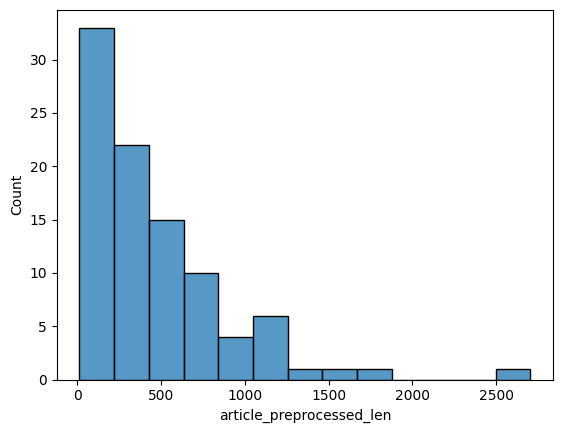

In [331]:
sns.histplot(df_impacted_random["article_preprocessed_len"])